In [2]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl

In [6]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Pupils\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]



# pupil size on sections of writing
writingSectionsMean1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]

df['writingSectionsMean1'] = writingSectionsMean1
df['writingSectionsMean2'] = writingSectionsMean2
df['writingSectionsMean3'] = writingSectionsMean3
df['writingSectionsMean4'] = writingSectionsMean4

# pupil size on sections of writing
writingSectionsMedian1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMedian]
writingSectionsMedian2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMedian]
writingSectionsMedian3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMedian]
writingSectionsMedian4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMedian]

df['writingSectionsMedian1'] = writingSectionsMedian1
df['writingSectionsMedian2'] = writingSectionsMedian2
df['writingSectionsMedian3'] = writingSectionsMedian3
df['writingSectionsMedian4'] = writingSectionsMedian4


# pupil size on sections of writing
writingSectionsMin1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMin]
writingSectionsMin2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMin]
writingSectionsMin3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMin]
writingSectionsMin4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMin]

df['writingSectionsMin1'] = writingSectionsMin1
df['writingSectionsMin2'] = writingSectionsMin2
df['writingSectionsMin3'] = writingSectionsMin3
df['writingSectionsMin4'] = writingSectionsMin4


# pupil size on sections of writing
writingSectionsMax1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMax]
writingSectionsMax2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMax]
writingSectionsMax3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMax]
writingSectionsMax4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMax]

df['writingSectionsMax1'] = writingSectionsMax1
df['writingSectionsMax2'] = writingSectionsMax2
df['writingSectionsMax3'] = writingSectionsMax3
df['writingSectionsMax4'] = writingSectionsMax4


In [7]:
DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

In [10]:
df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])

df1.drop(columns=['PupilRelative_writingSectionsMean', 'PupilRelative_writingSectionsMedian', 'PupilRelative_writingSectionsMin', 'PupilRelative_writingSectionsMax'], axis=0, inplace=True)

df1.to_csv(r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils.csv', sep=',',na_rep='', header=True, index=False)


0      5.0
1      5.0
2      5.0
3      5.0
4      5.0
5      5.0
6      5.0
7      5.0
8      5.0
9      5.0
10     4.0
11     4.0
12     4.0
13     4.0
14     4.0
15     4.0
16     4.0
17     4.0
18     4.0
19     4.0
20     2.0
21     2.0
22     2.0
23     2.0
24     2.0
25     4.0
26     4.0
27     4.0
28     4.0
29     4.0
      ... 
856    3.0
857    3.0
858    3.0
859    3.0
860    3.0
861    5.0
862    5.0
863    5.0
864    5.0
865    5.0
866    5.0
867    5.0
868    5.0
869    5.0
870    5.0
871    5.0
872    5.0
873    5.0
874    5.0
875    5.0
876    2.0
877    2.0
878    2.0
879    2.0
880    2.0
881    4.0
882    4.0
883    4.0
884    4.0
885    4.0
Name: FatigueDuring, Length: 886, dtype: float64

# Box plots of absolute baseline, reading and writing pupil size

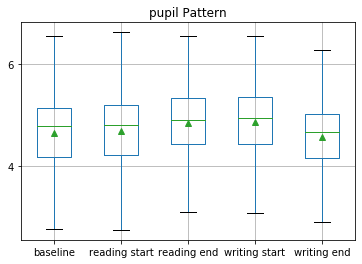

In [5]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


boxplot = df1.boxplot(column=plot_variables, sym='', positions=None, widths=None, \
        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#list1 = list()
#for ind, variable in enumerate(plot_variables):
#    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
#    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
#                 df1[variable][df1.SessionDifficulty=='E'].std(), fmt='-ob', capsize=5)
#ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4,5])
#ax1.set_ylim([3.8, 5.6])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

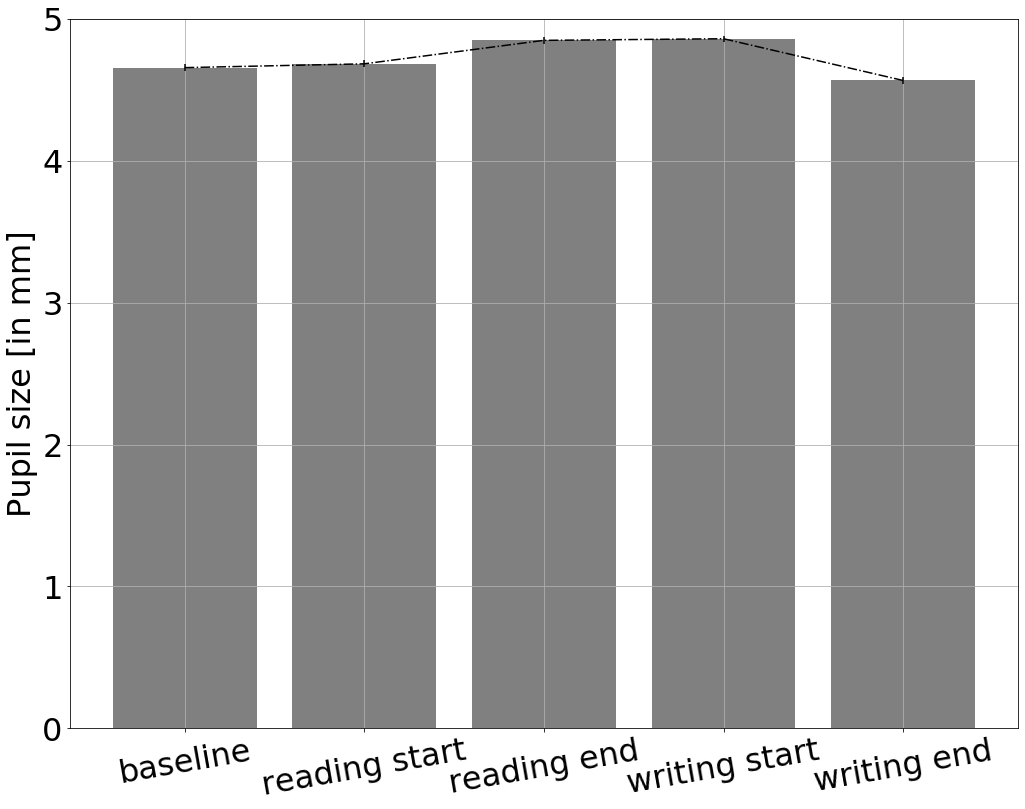

In [6]:
PlotTitle = 'pupil Pattern'
fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


x_inds = [1, 2, 3, 4, 5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable].mean())
    x_list1.append(x_inds[ind])
    p1 = ax1.bar(x_inds[ind], df1[variable].mean(), yerr = \
                 df1[variable].std()/np.sqrt(df1[variable].count()), color='gray')
    
ax1.plot(x_list1, list1, '-.', color='k')

ax1.set_xticks(x_inds)
ax1.set_ylim([0, 5])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'], rotation = 10)
plt.rcParams.update({'font.size': 32})
ax1.set_ylabel('Pupil size [in mm]')
#ax1.legend((p1, p2), ('Easy', 'Difficult'))
plt.grid('on')
plt.tight_layout()


fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\pupilAbsolute_pattern.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

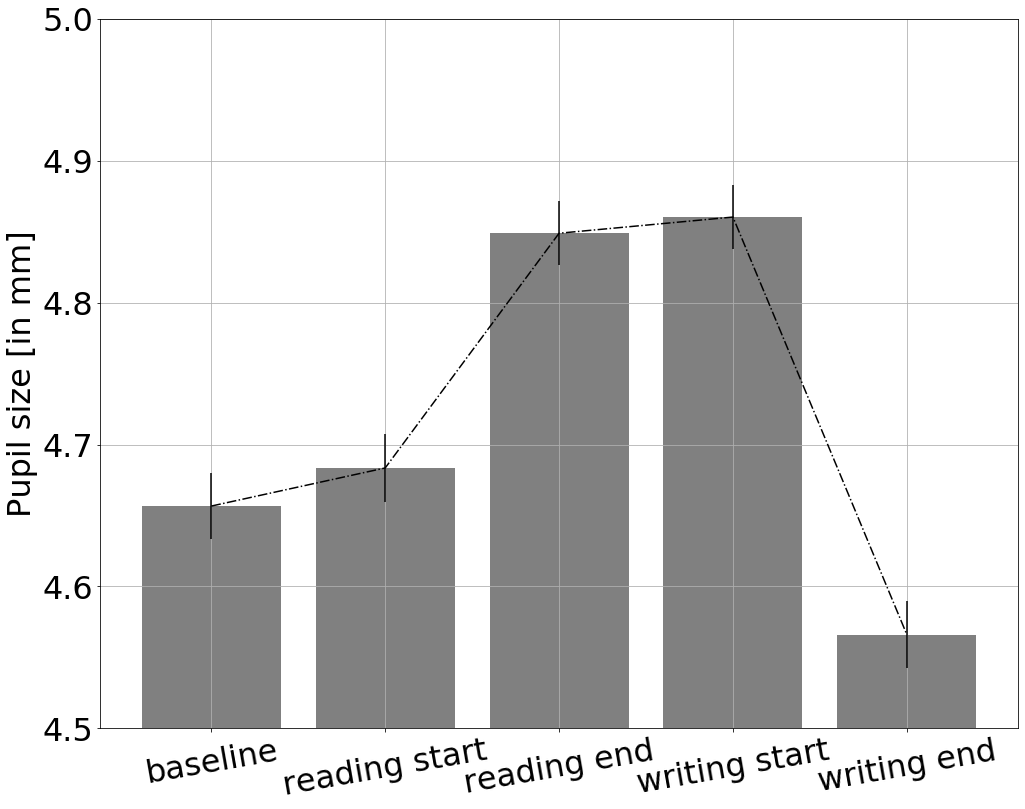

In [7]:
PlotTitle = 'pupil Pattern'
fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


x_inds = [1, 2, 3, 4, 5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable].mean())
    x_list1.append(x_inds[ind])
    p1 = ax1.bar(x_inds[ind], df1[variable].mean(), yerr = \
                 df1[variable].std()/np.sqrt(df1[variable].count()), color='gray')
    
ax1.plot(x_list1, list1, '-.', color='k')

ax1.set_xticks(x_inds)
ax1.set_ylim([4.5, 5])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'], rotation = 10)
plt.rcParams.update({'font.size': 32})
ax1.set_ylabel('Pupil size [in mm]')
#ax1.legend((p1, p2), ('Easy', 'Difficult'))
plt.grid('on')
plt.tight_layout()


fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\pupilAbsolute_patternZoom.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

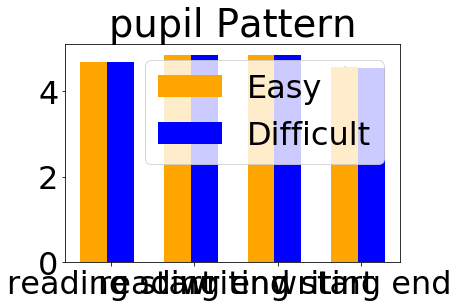

In [8]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


## Pupil size zoomed for easy and difficult

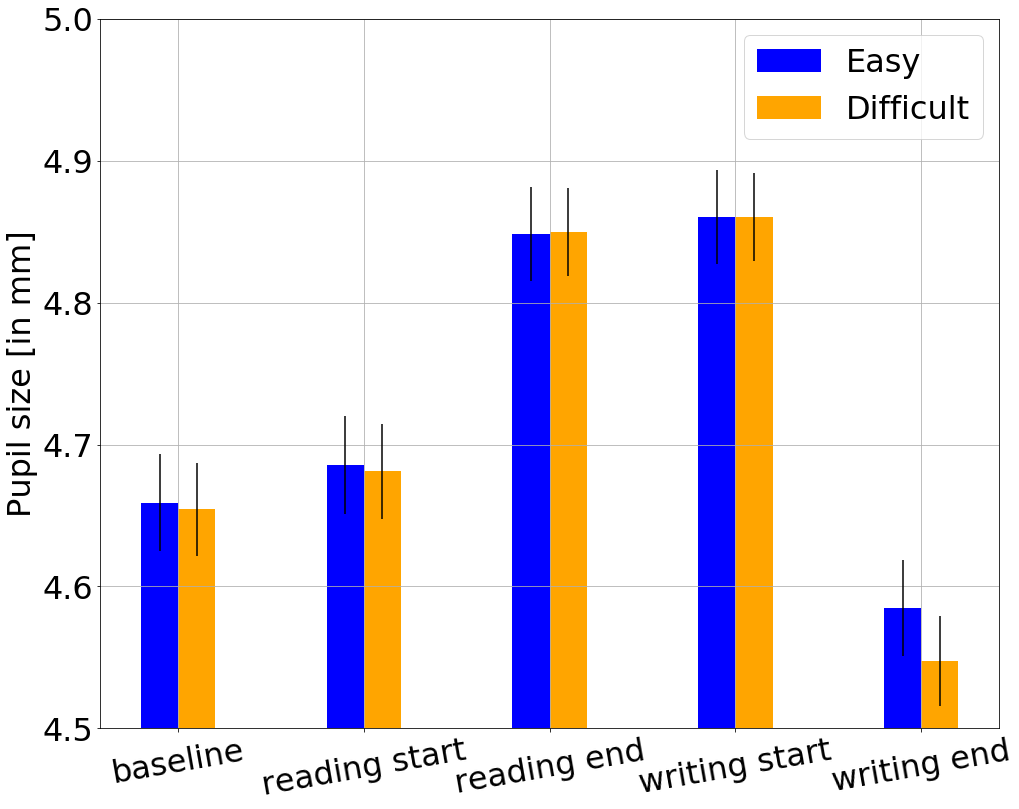

In [9]:
PlotTitle = 'pupil Pattern'
fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


x_inds = [1, 3.5, 6, 8.5, 11]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable].mean())
    x_list1.append(x_inds[ind])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()),\
                 color='blue', width=0.5)
    p2 = ax1.bar(x_inds[ind]+0.5, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()),\
                 color='orange', width=0.5)
    
#ax1.plot(x_list1, list1, '-.', color='k')

ax1.set_xticks([1.25, 3.75, 6.25, 8.75, 11.25])
ax1.set_ylim([4.5, 5])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'], rotation = 10)
plt.rcParams.update({'font.size': 32})
ax1.set_ylabel('Pupil size [in mm]')
ax1.legend((p1, p2), ('Easy', 'Difficult'))
plt.grid('on')
plt.tight_layout()


fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\pupilRelative_patternZoom.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Time On Task

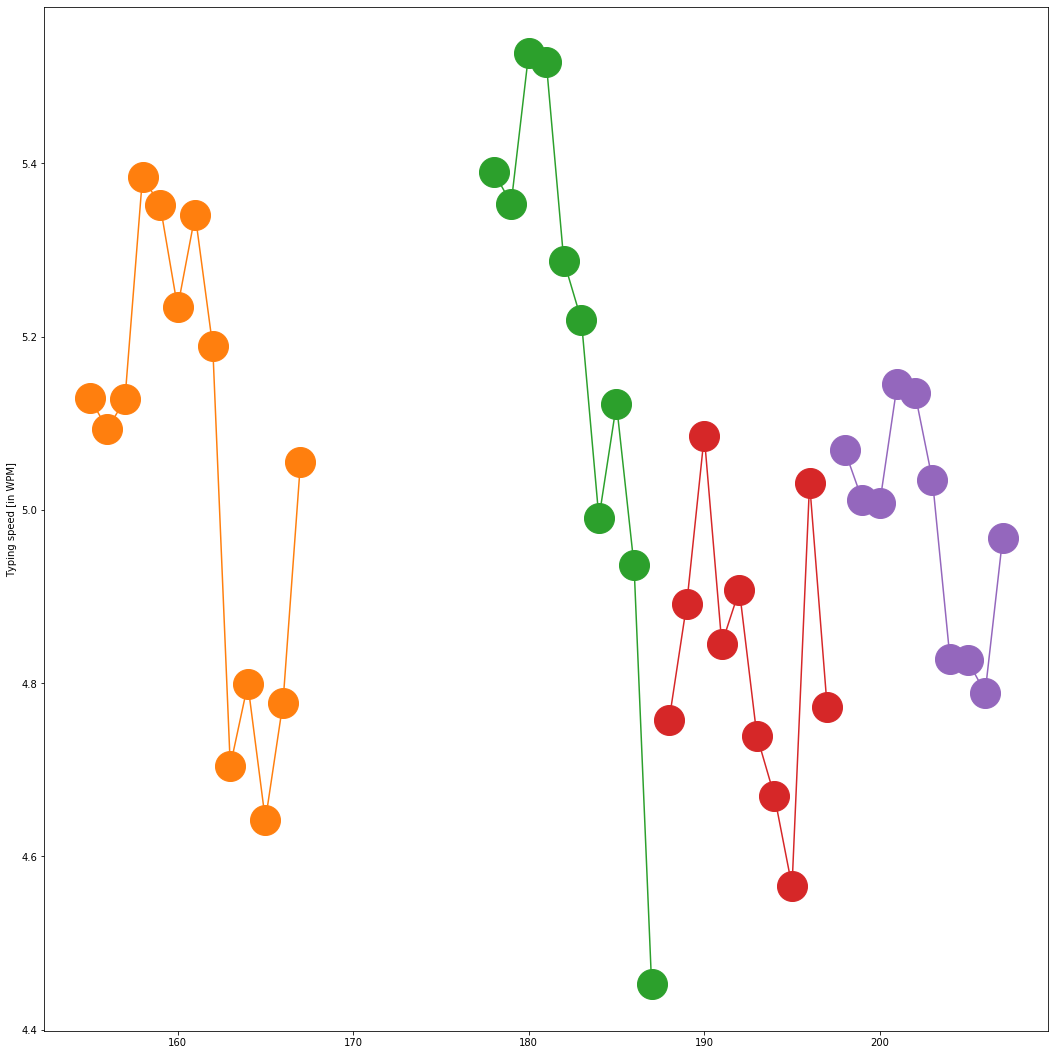

In [6]:
PlotTitle = 'PupilAbsolute_baseline'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'PupilAbsolute_baseline'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12



subject = 'bh1'

list1 = list()
x_list1 = list()

for ind, day in enumerate(np.unique(df1.DayDT)):
    #print(ind, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), \
                                            #df1.DayDT==day)])
    
    
    p1 = ax1.plot(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
                df1.Subject==subject), df1.DayDT==day)], marker = 'o', ms=30)
    
    #p1 = ax1.errorbar(timeOnTask[ind], df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', \
    #            df1.Subject==subject), df1.Trial==str(trial))].mean(), yerr = df1[variable][np.logical_and(np.logical_and\
    #            (df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].std()/np.sqrt(df1[variable][\
    #            np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Subject==subject), df1.Trial==trial)].count()\
    #            ), marker = 'o', color='orange')
    
    
    
    
#ax1.set_ylim([0, 12])
ax1.set_ylabel('Typing speed [in WPM]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
#fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilAbsolute_baseline_TimeOnTask.png', dpi = 300, \
#            bbox_to_anchor = (0.95, 0.1))

In [12]:
df2 = df1[np.logical_and(np.logical_and(np.logical_and(np.logical_and(df1.Subject != 'ac', df1.Subject!='ph'), df1.Subject!='jm'), df1.Subject!='cw'), df1.Subject!='ls2')]


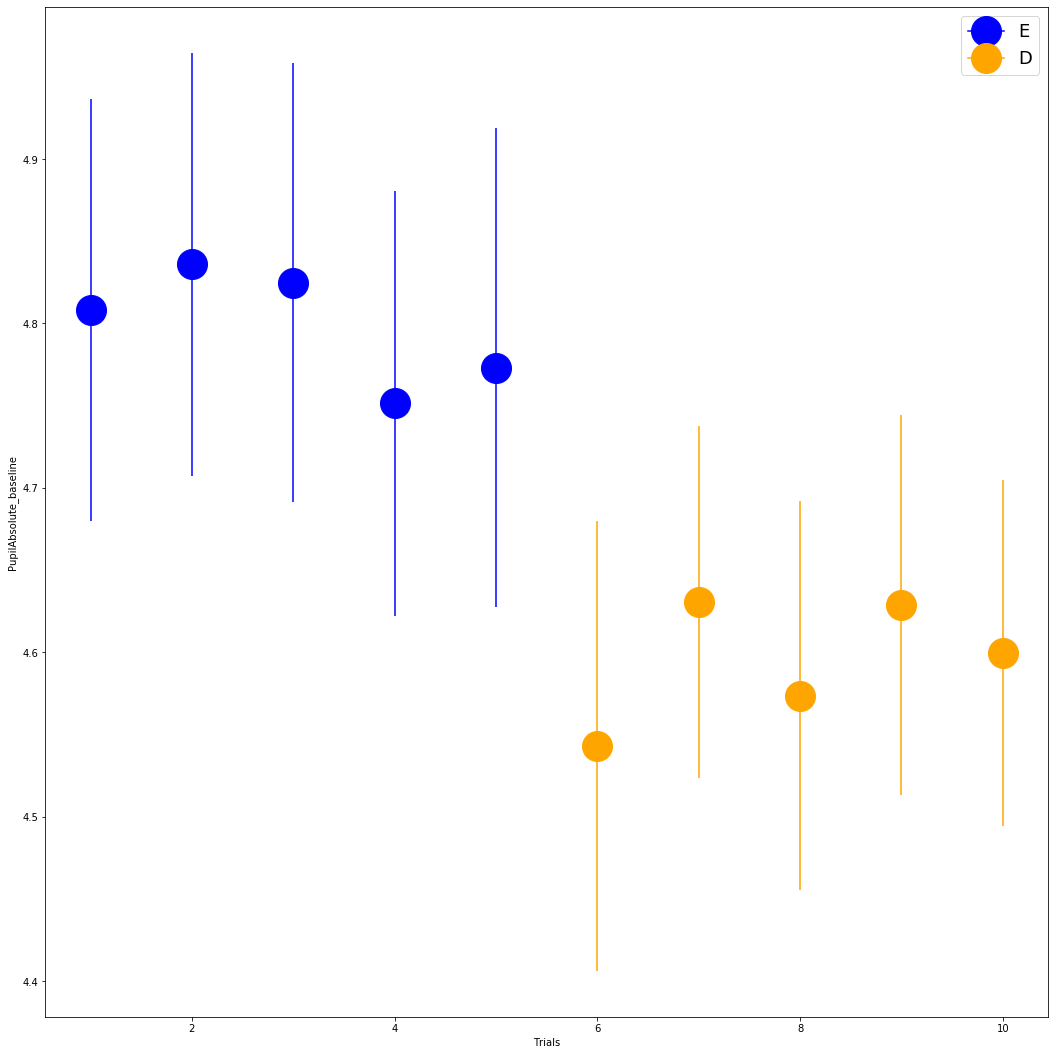

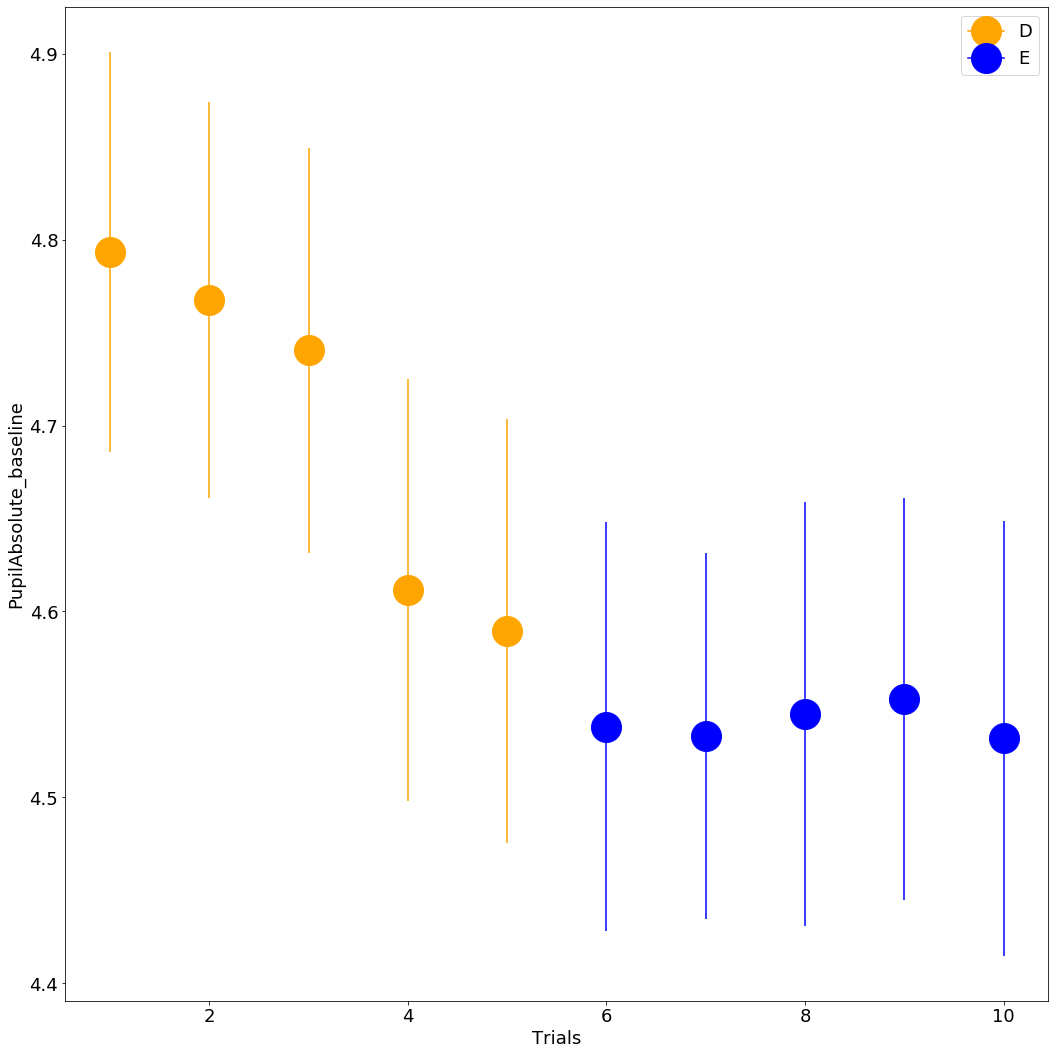

In [5]:


variable = 'PupilAbsolute_baseline'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('PupilAbsolute_baseline')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.05, 0.32])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






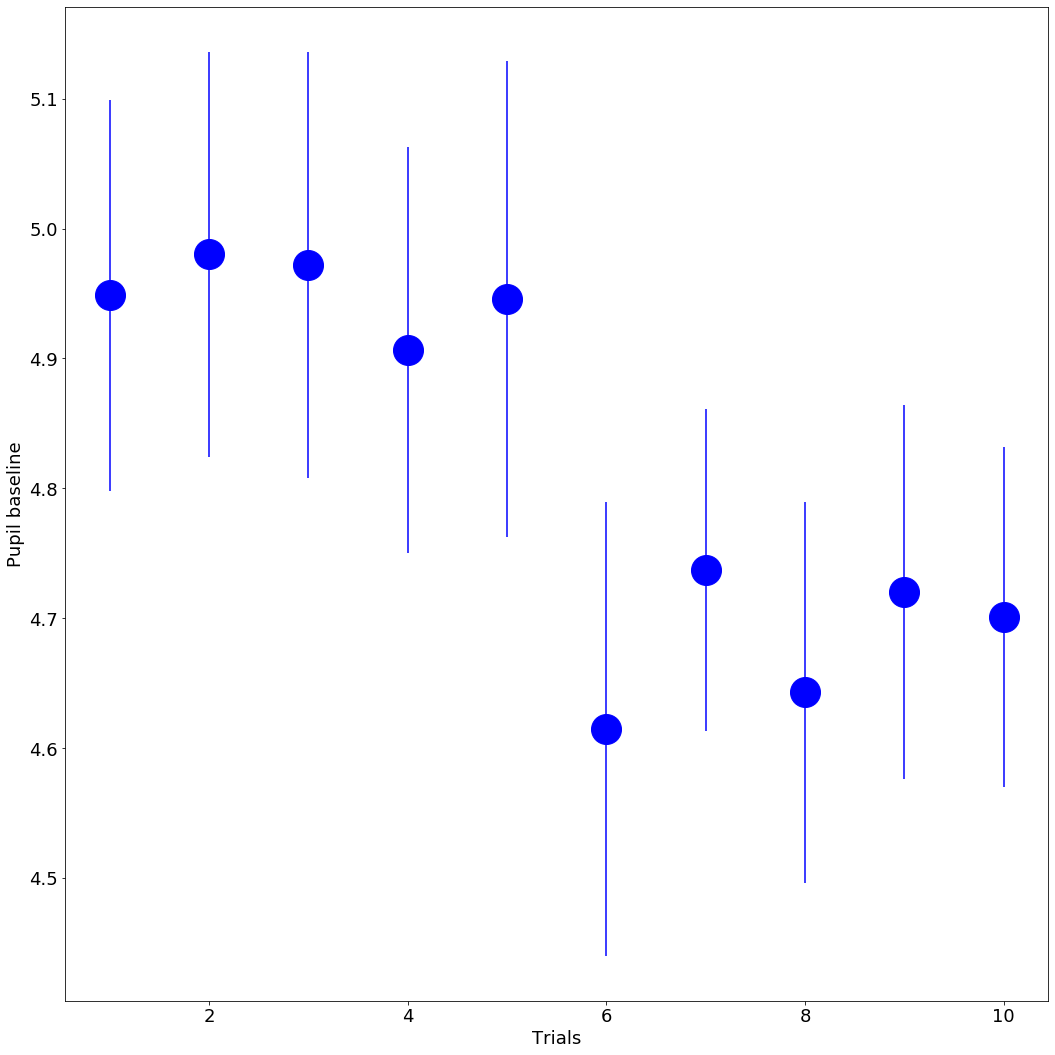

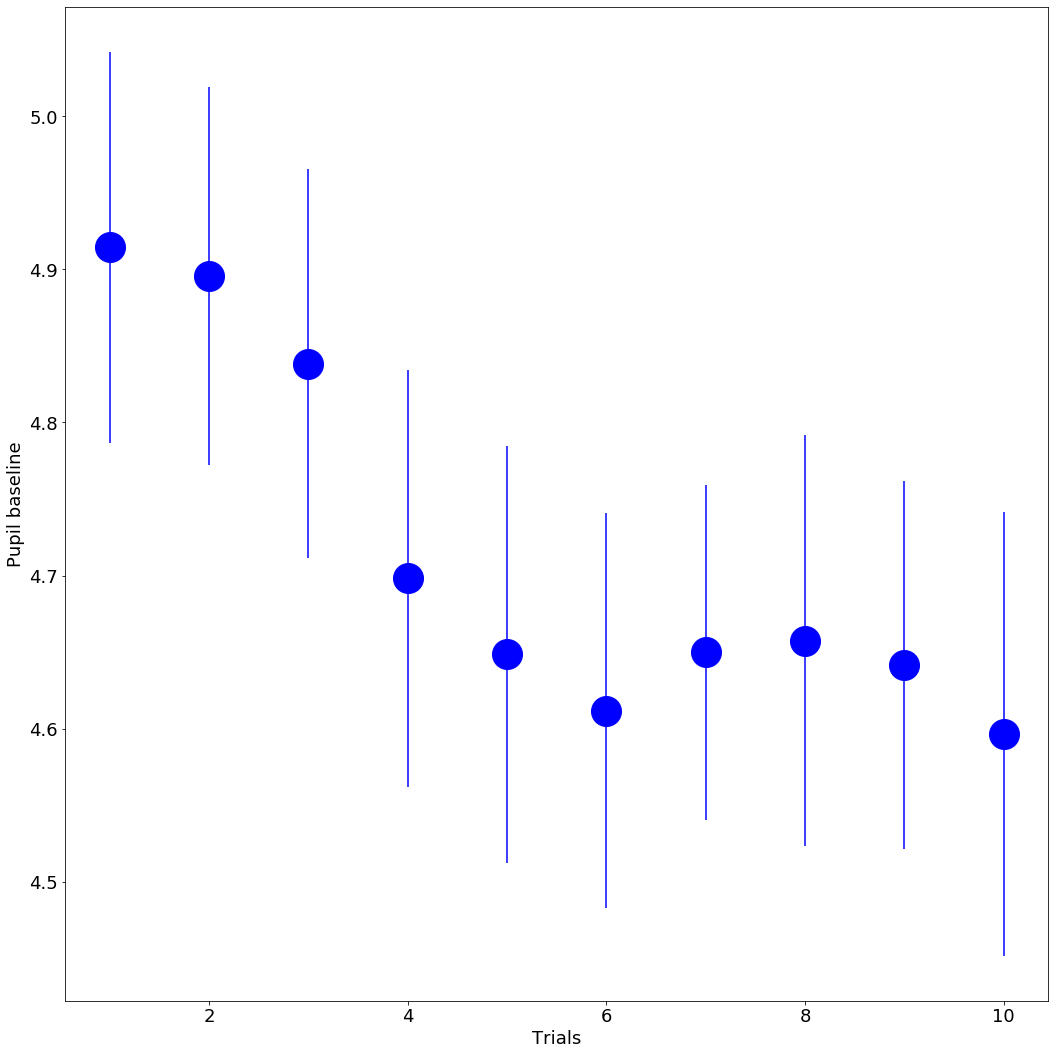

In [15]:


variable = 'PupilAbsolute_baseline'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df2.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==1), df2.SessionDifficulty==session1Difficulty)].mean(), df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==1), df2.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==1), df2.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==2), df2.SessionDifficulty==session2Difficulty)].mean(), df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==2), df2.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df2[variable][np.logical_and(np.logical_and(np.logical_and(df2.TypingTechnique=='DT', df2.Trial==\
                    trial), df2.Session==2), df2.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('Pupil baseline')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([4.4, 5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '_noGlasses.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    




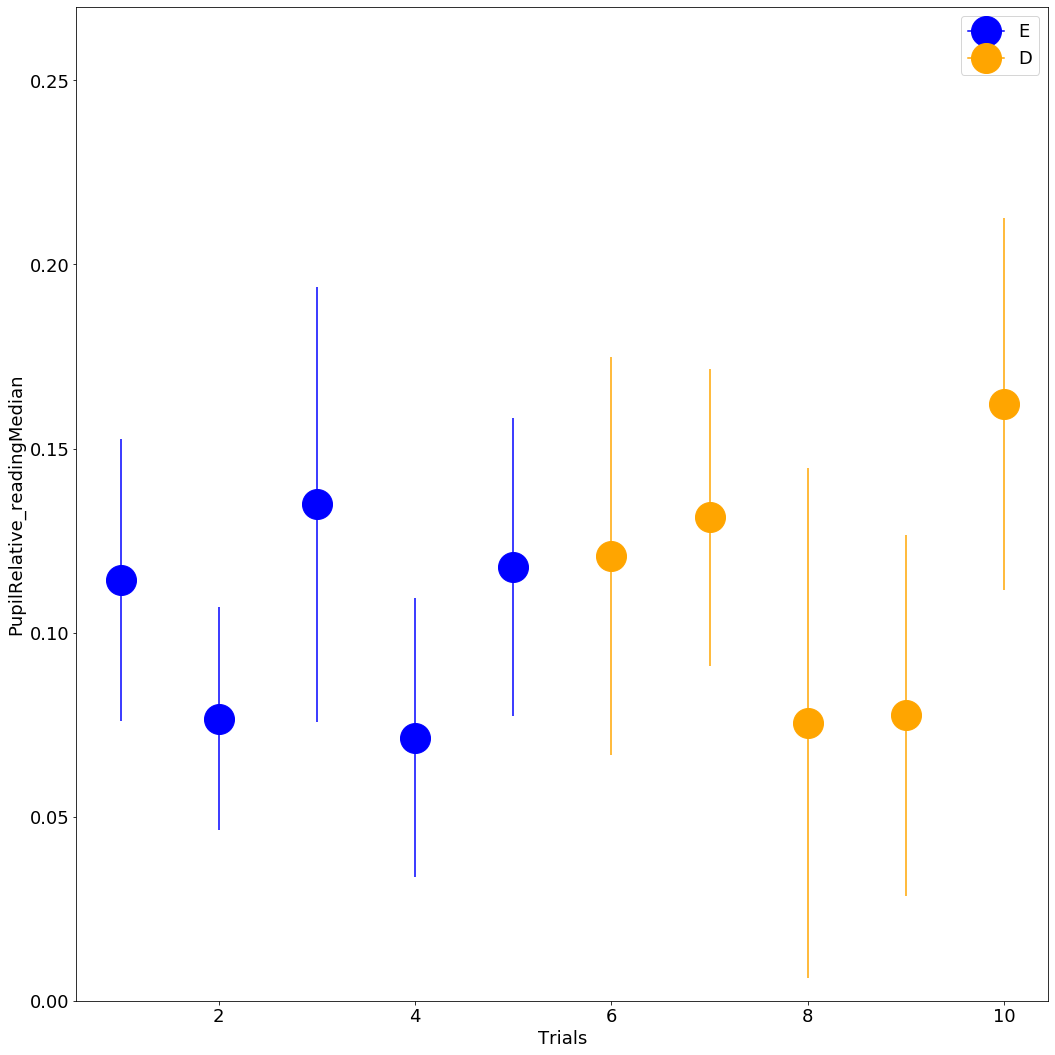

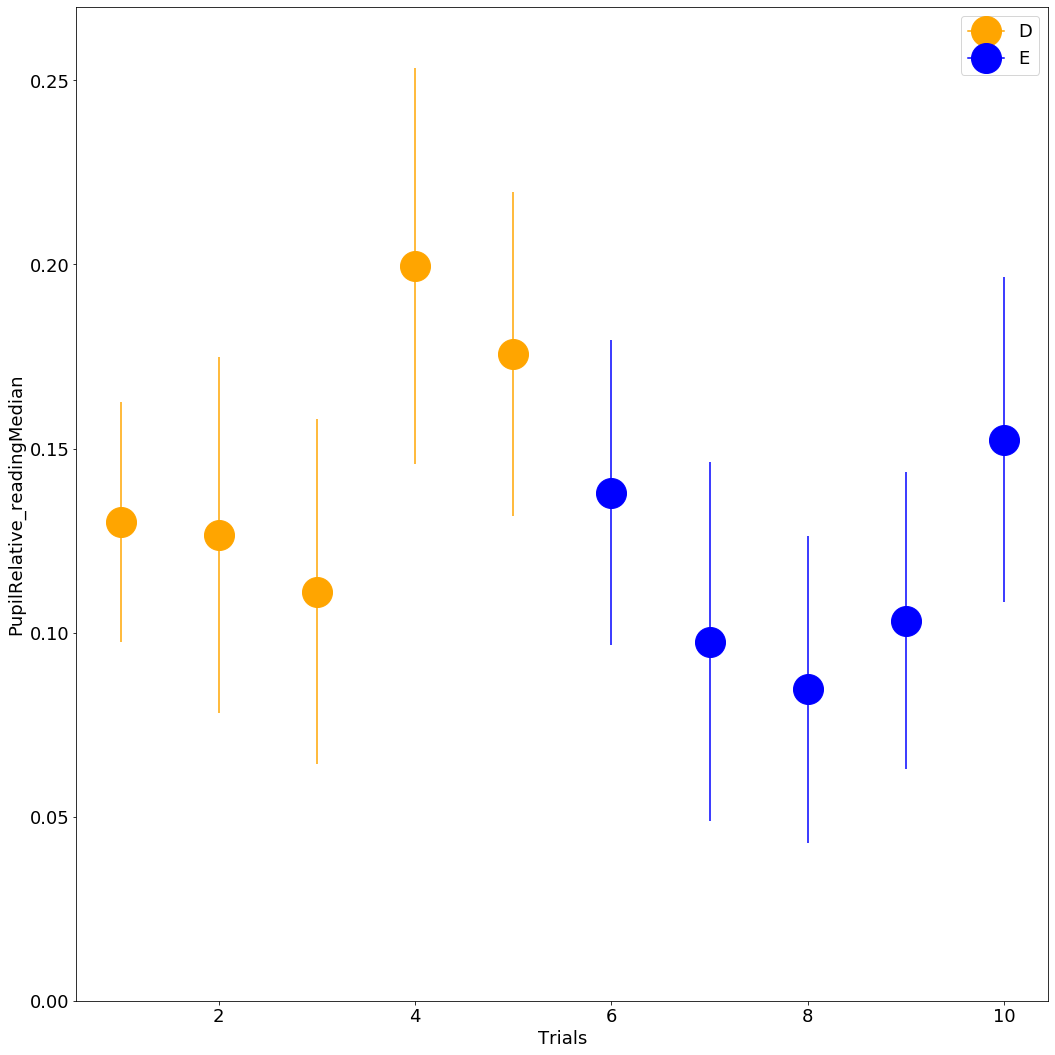

In [7]:


variable = 'PupilRelative_readingMedian'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('PupilRelative_readingMedian')
    ax1.set_xlabel('Trials')
    ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilRelative_readingMedian_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






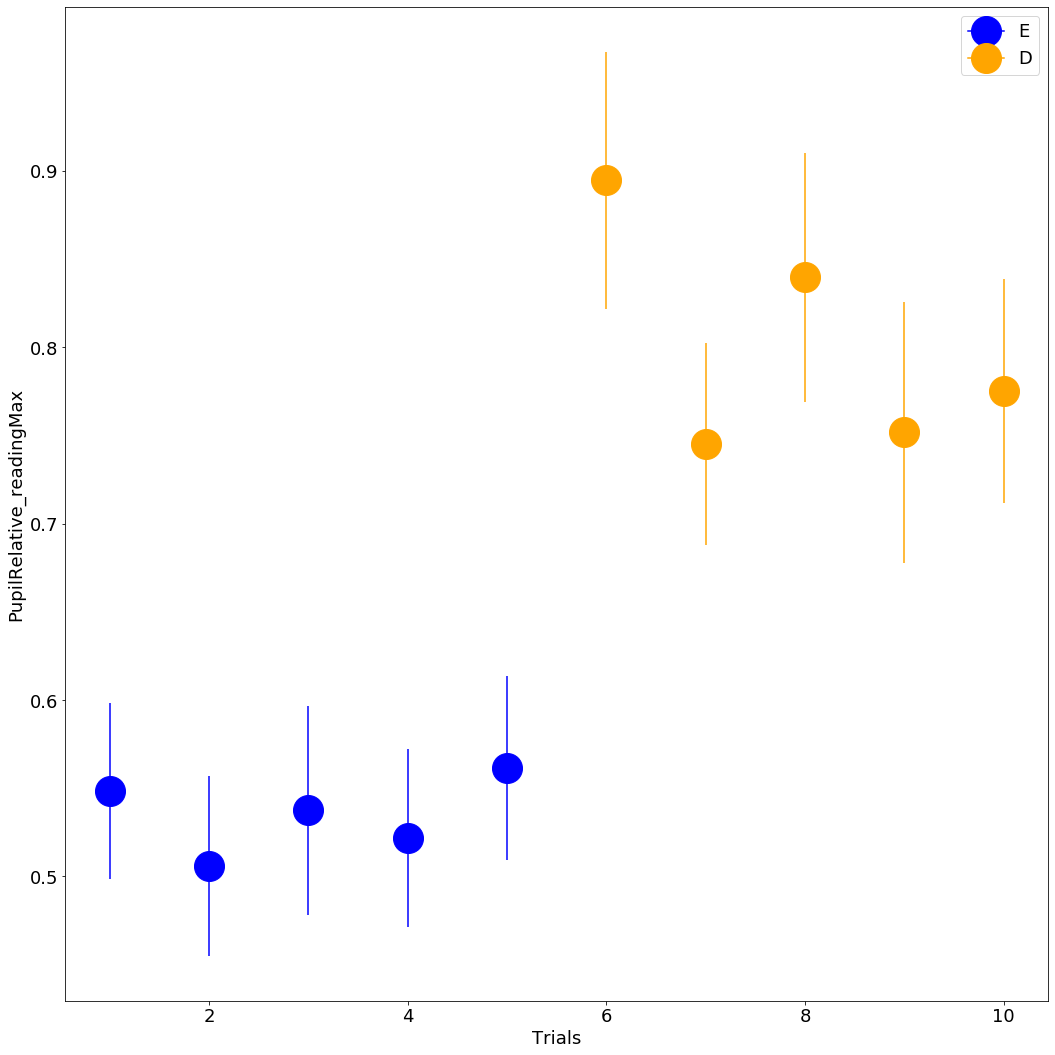

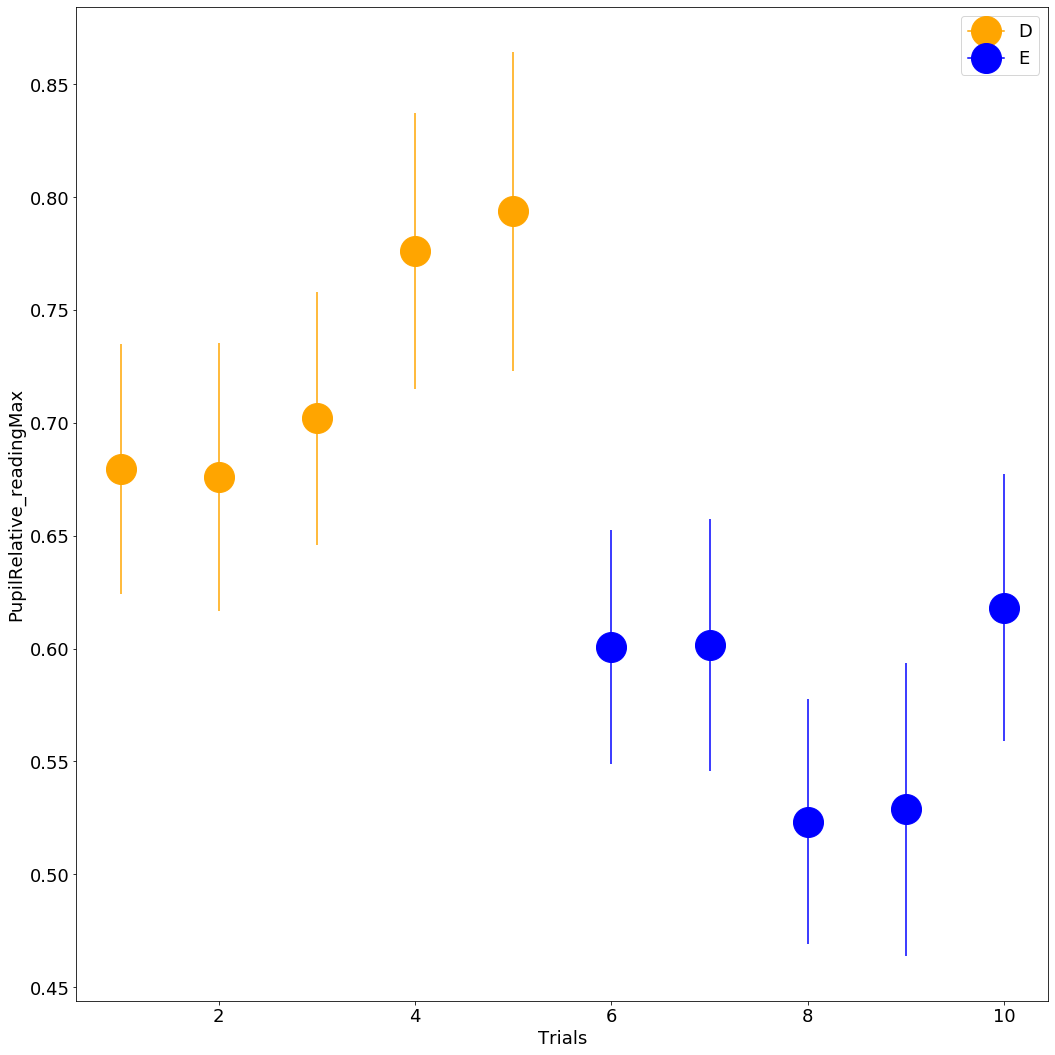

In [8]:


variable = 'PupilRelative_readingMax'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('PupilRelative_readingMax')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilRelative_readingMax_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






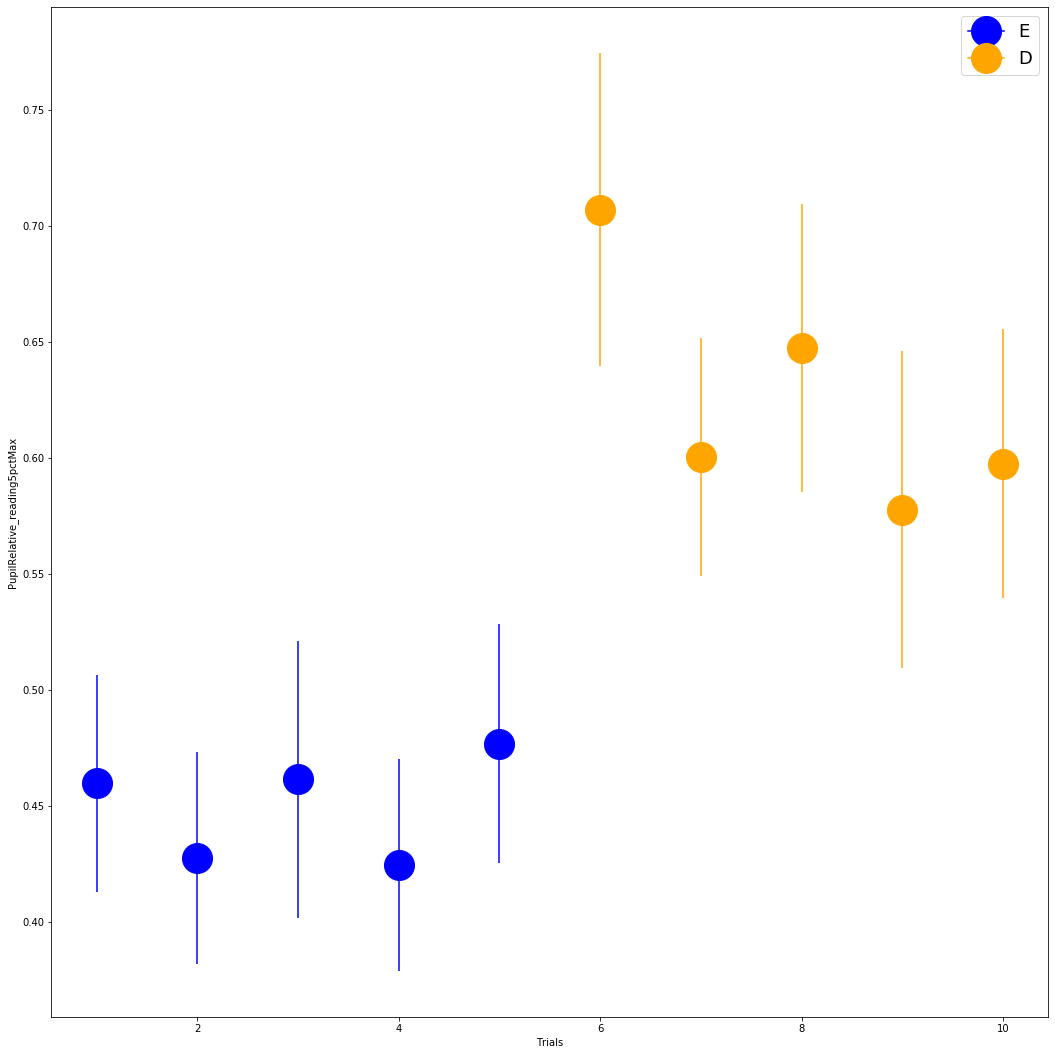

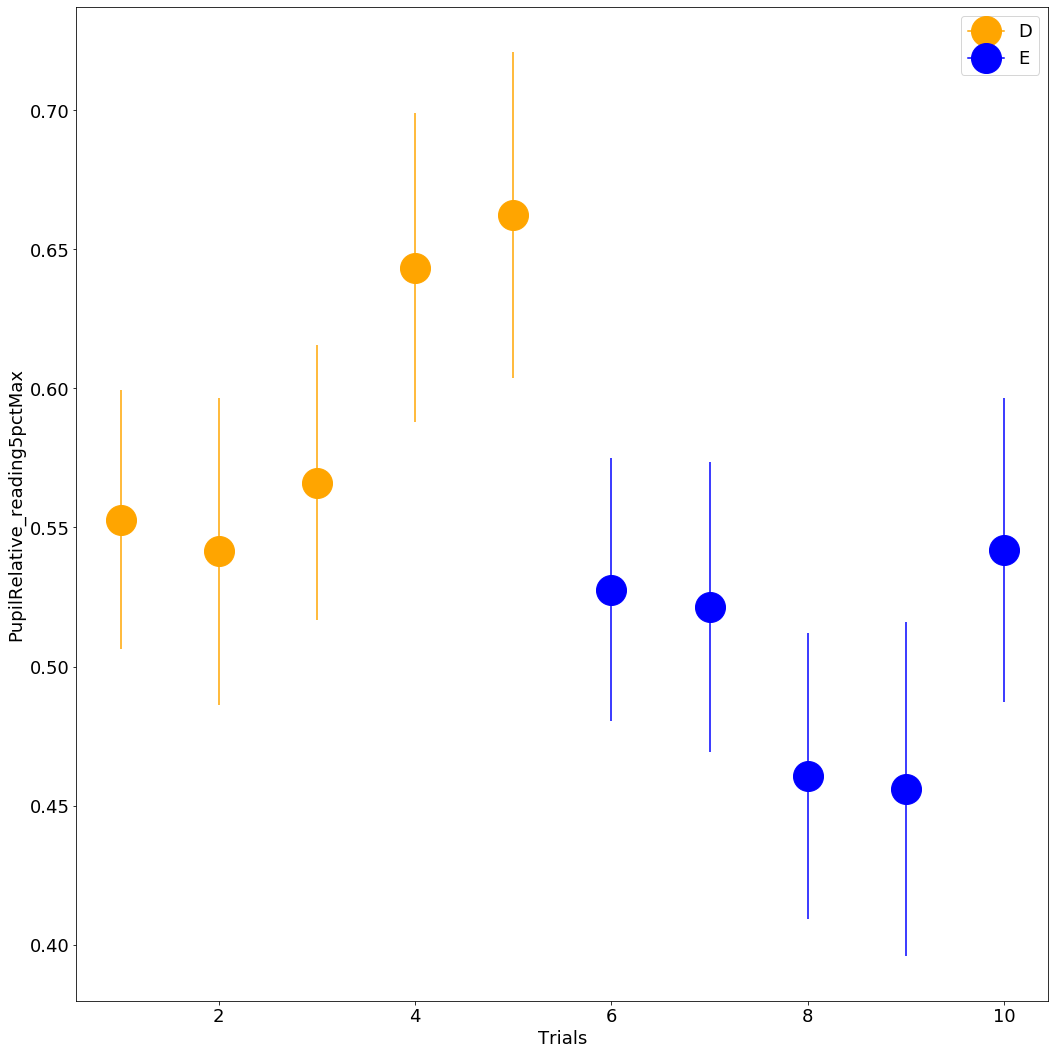

In [5]:


variable = 'PupilRelative_reading5pctMax'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('PupilRelative_reading5pctMax')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilRelative_reading5pctMax_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






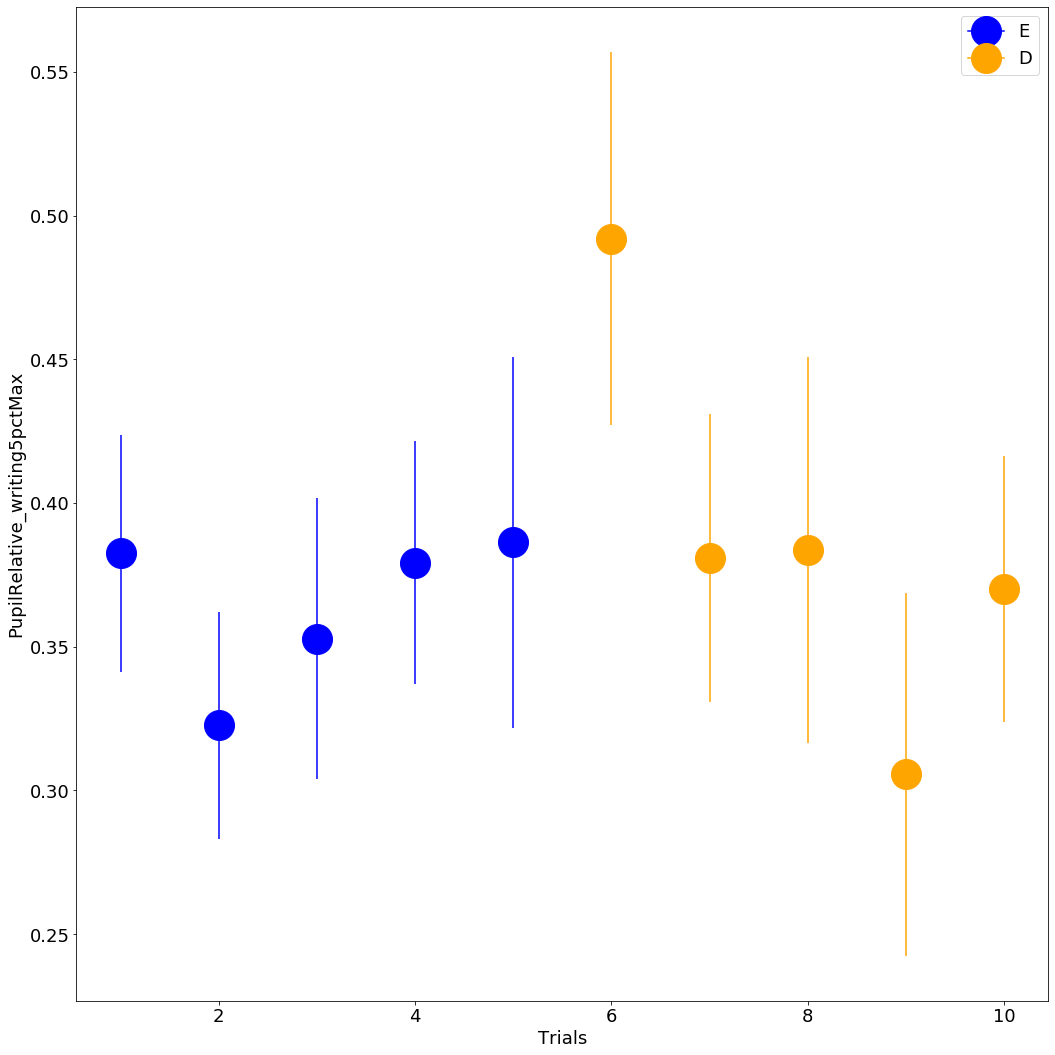

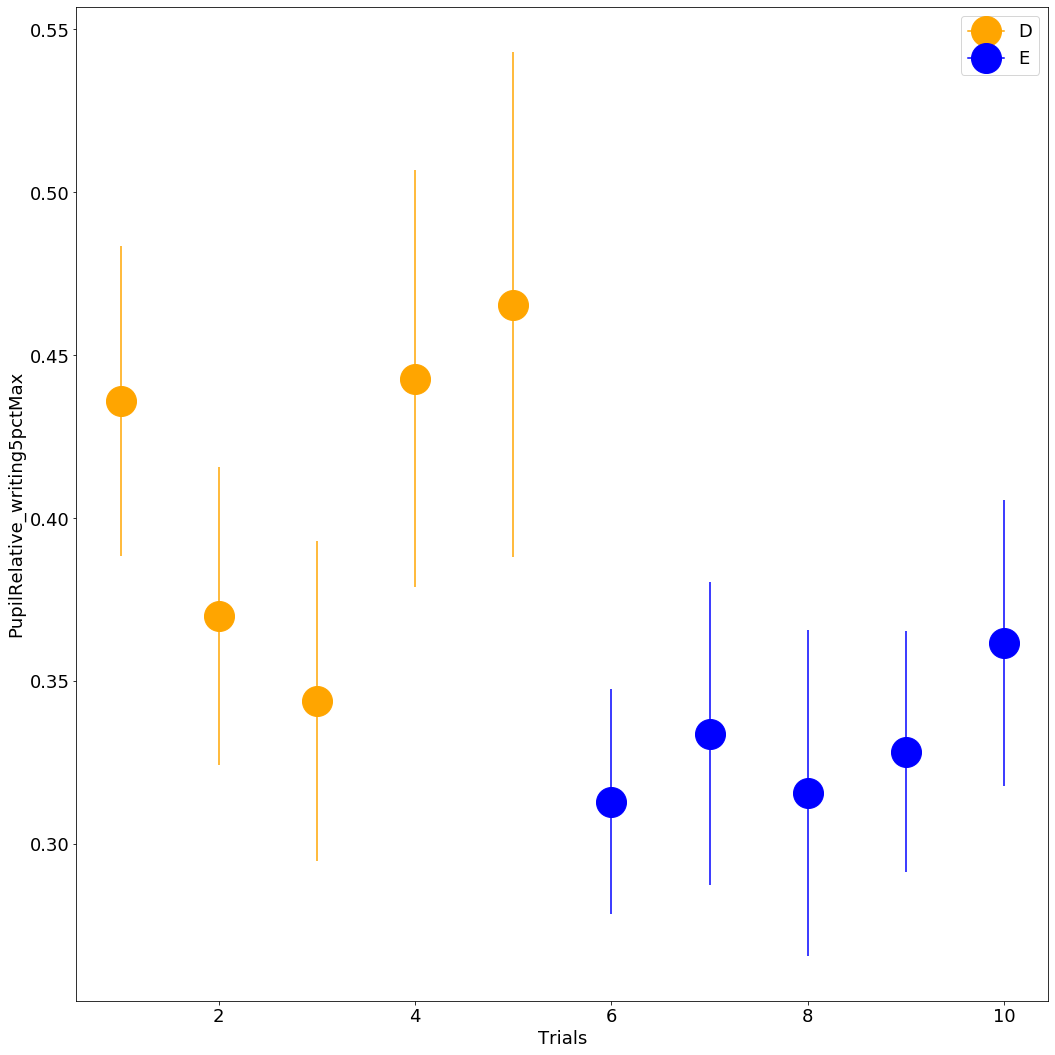

In [6]:


variable = 'PupilRelative_writing5pctMax'



timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
session1Color = 'blue'
session2Color = 'orange'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = session1Color)
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = session2Color)
    
    ax1.set_ylabel('PupilRelative_writing5pctMax')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([0.00, 0.27])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1, p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilRelative_writing5pctMax_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    session1Color = 'orange'
    session2Color = 'blue'
    
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))






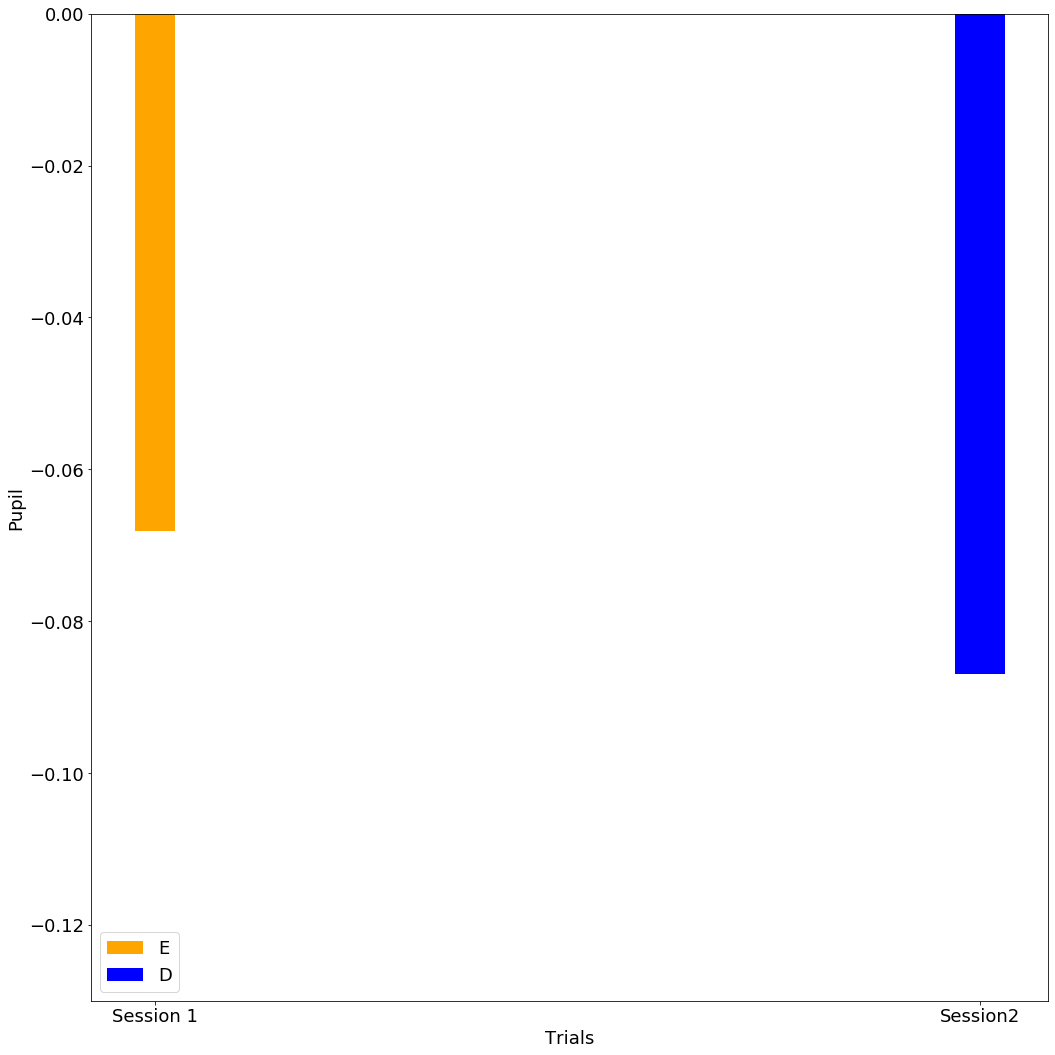

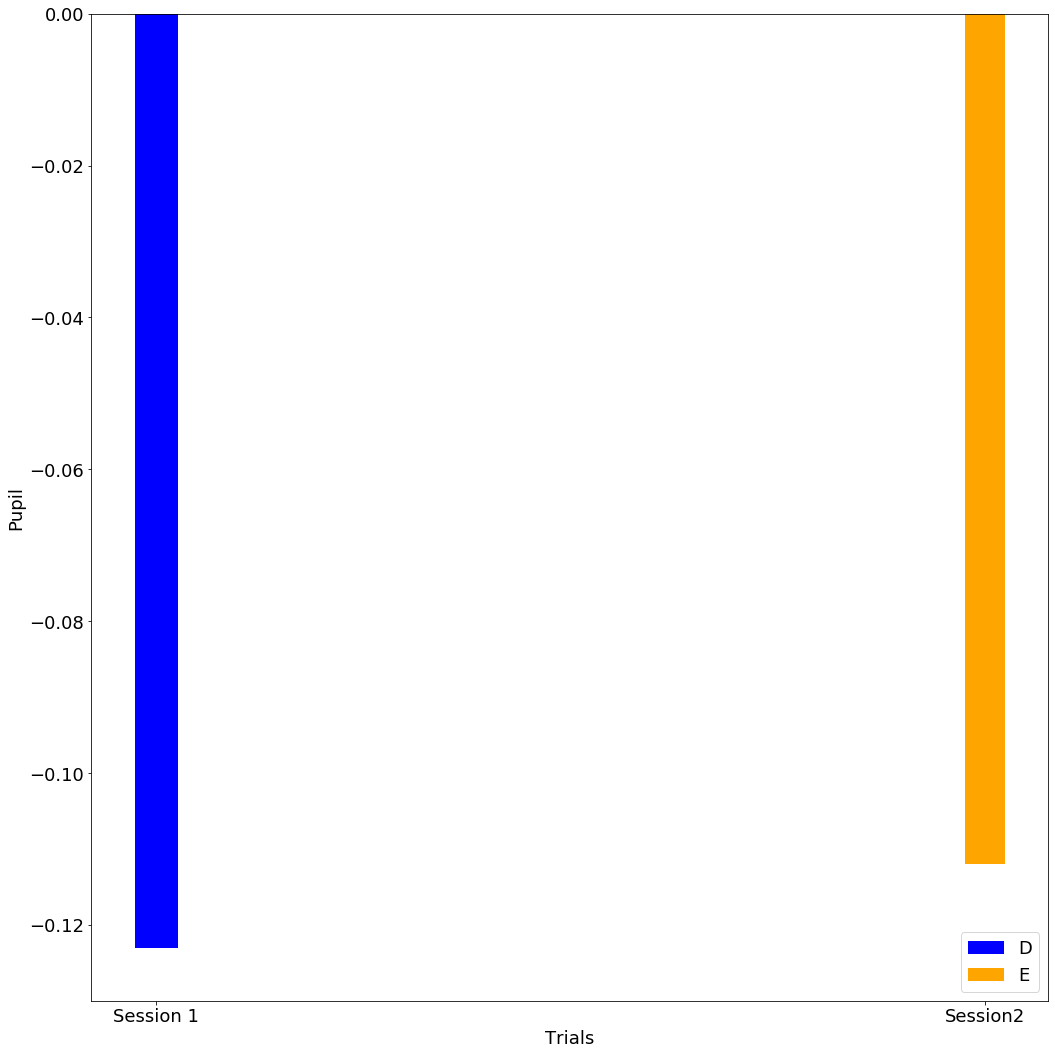

In [28]:


variable = 'PupilRelative_writingEnd'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




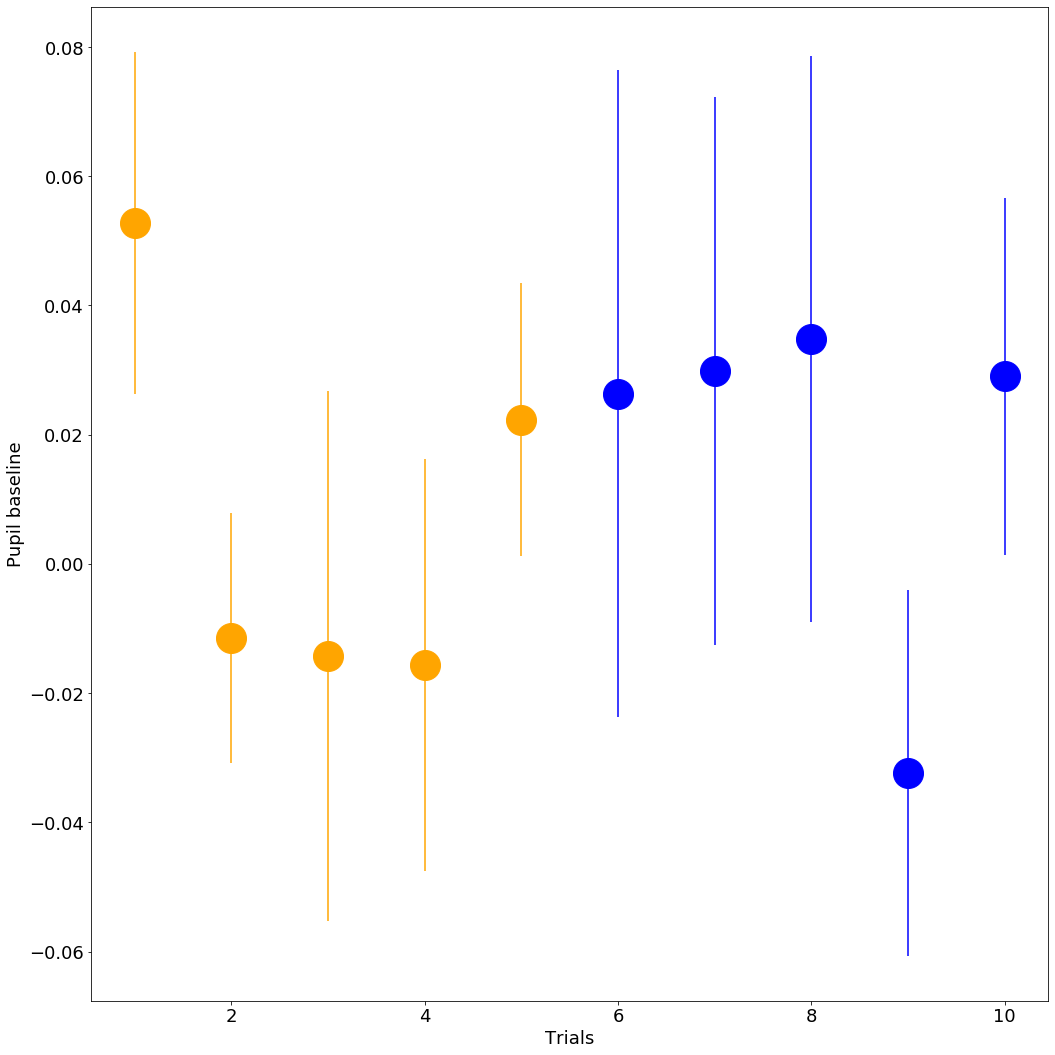

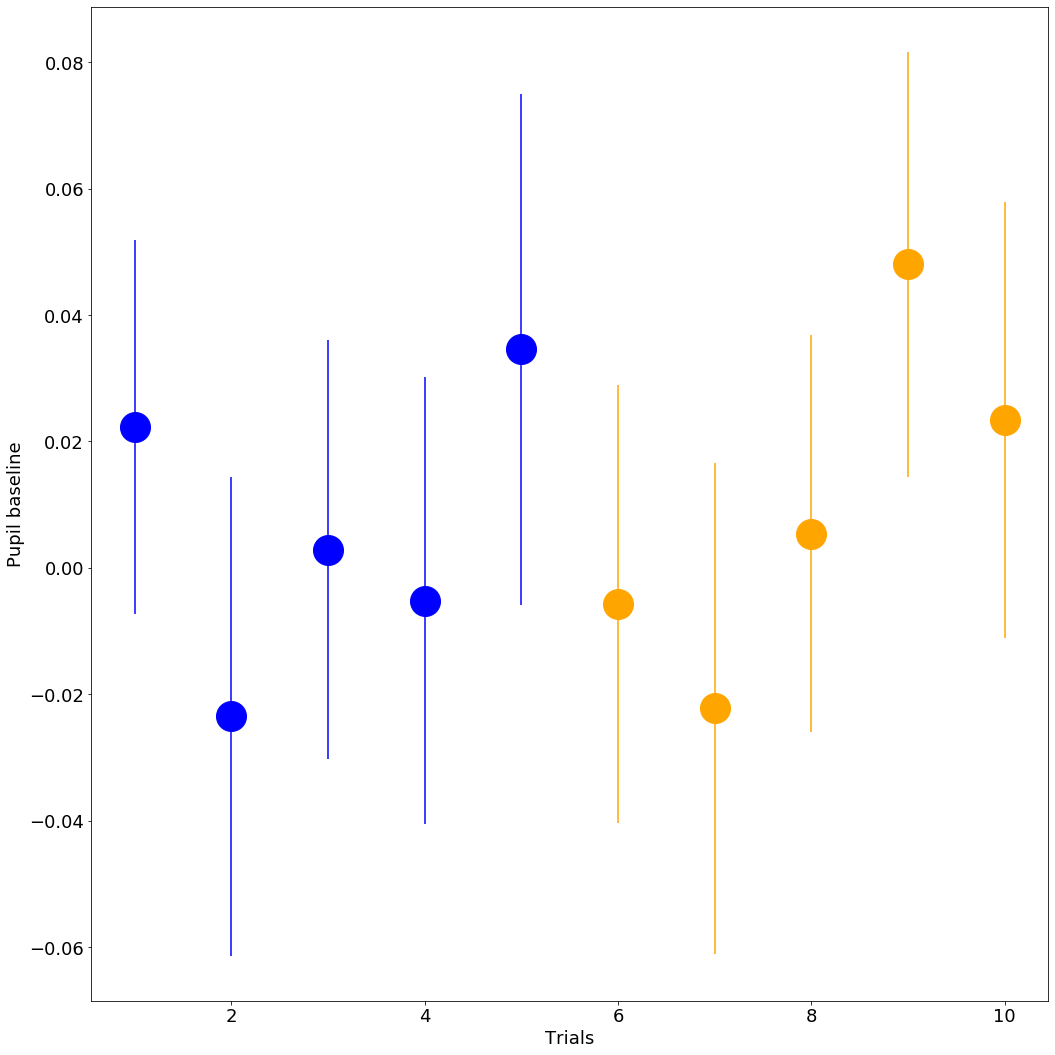

In [38]:


variable = 'PupilRelative_readingStart'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = colorList[0])
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = colorList[1])
    
    
    ax1.set_ylabel('Pupil baseline')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([4.4, 5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '_noGlasses.png' 
    #fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']

    




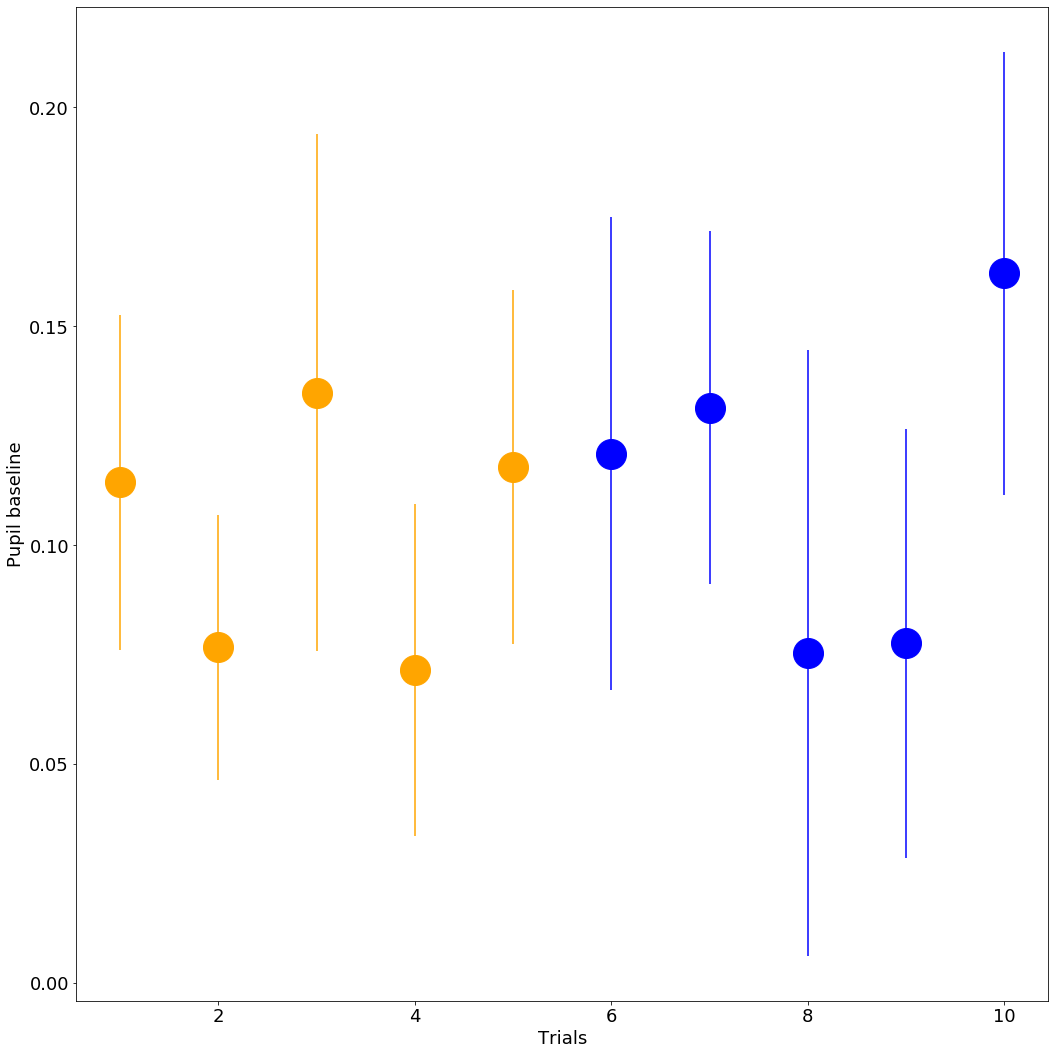

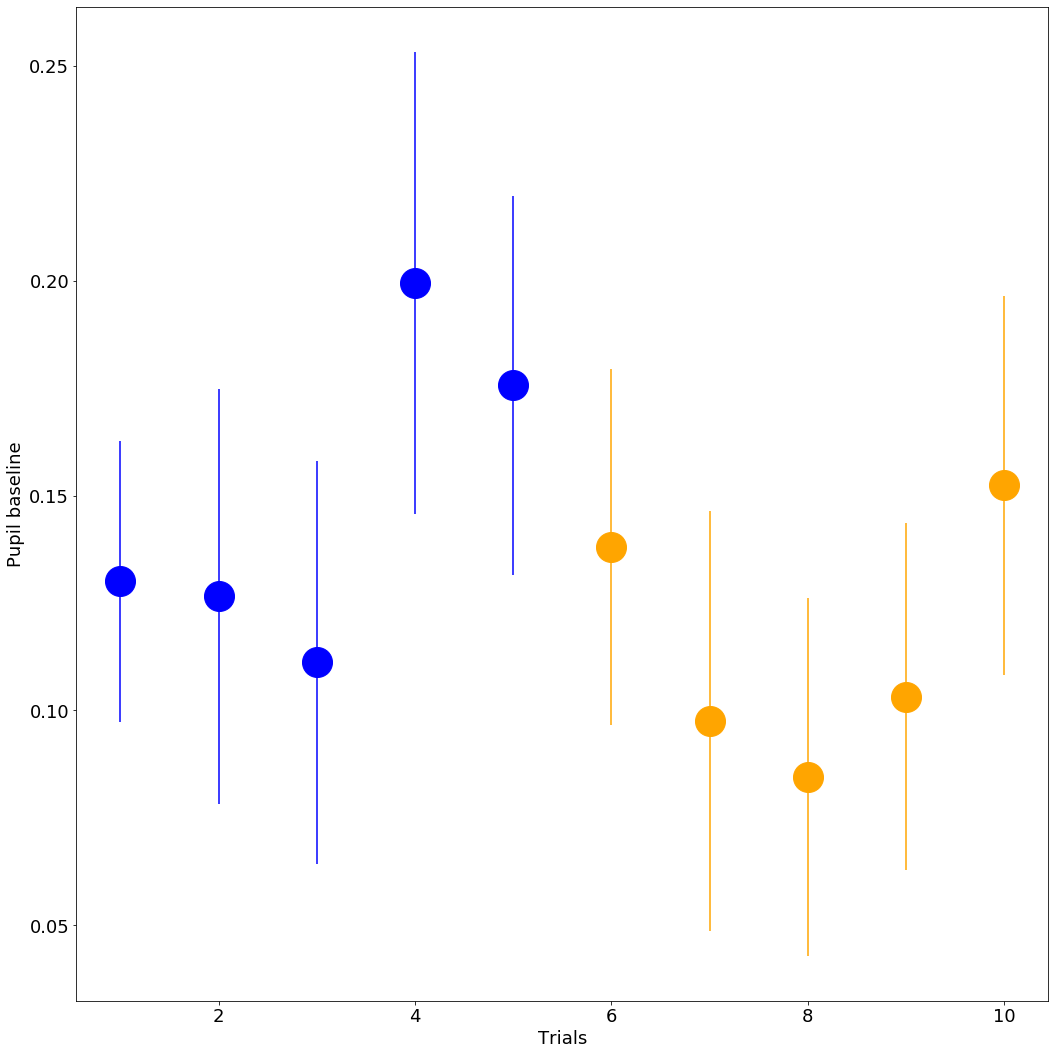

In [39]:


variable = 'PupilRelative_readingMedian'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = colorList[0])
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = colorList[1])
    
    
    ax1.set_ylabel('Pupil baseline')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([4.4, 5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '_noGlasses.png' 
    #fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']

    




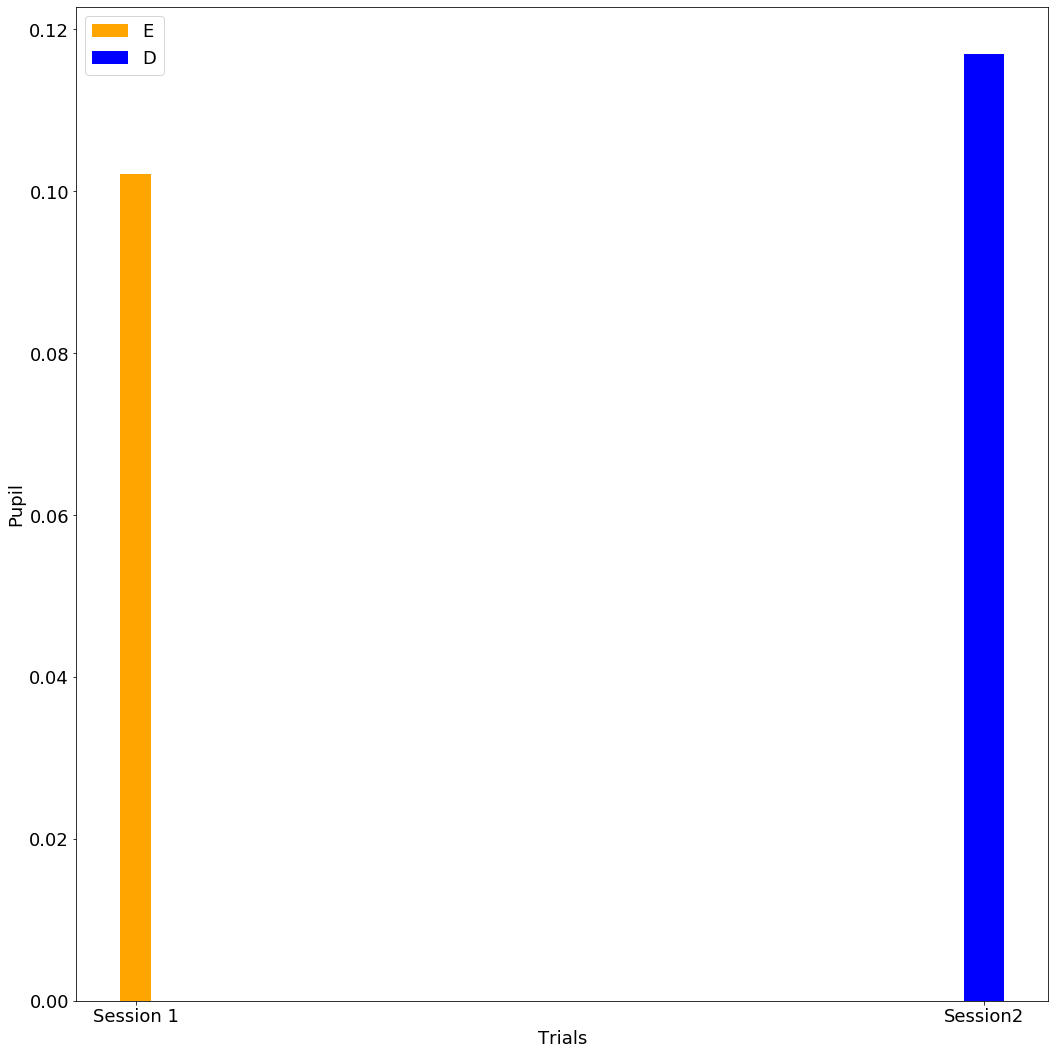

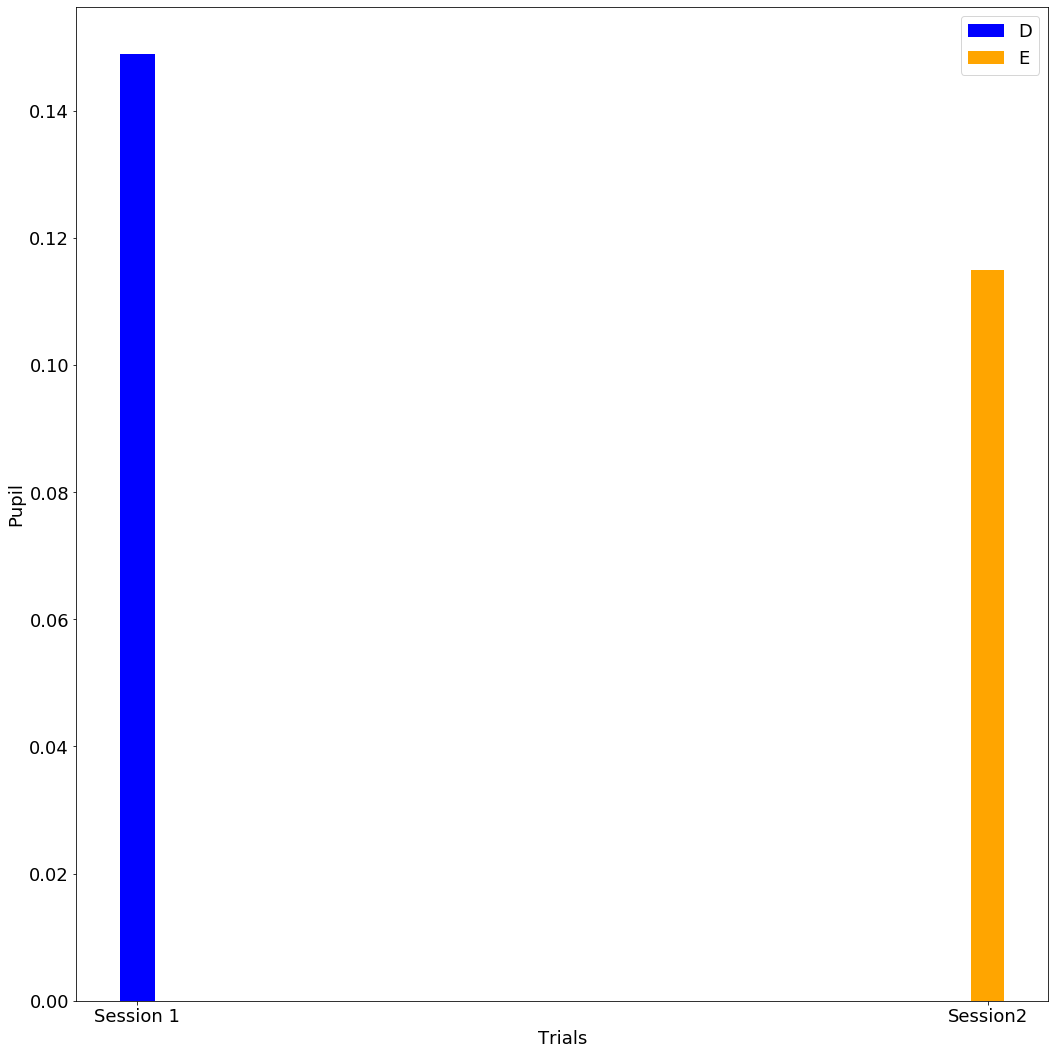

In [40]:


variable = 'PupilRelative_readingMedian'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




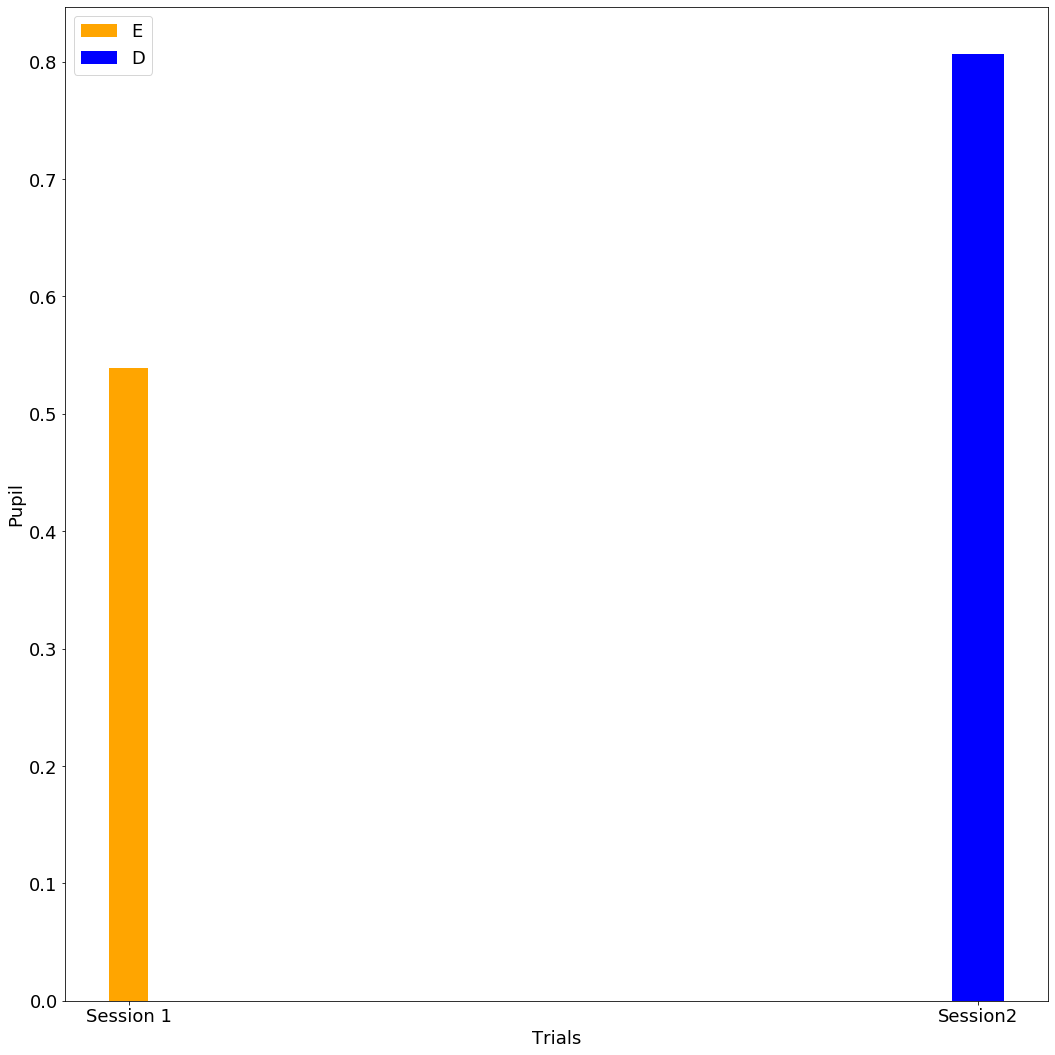

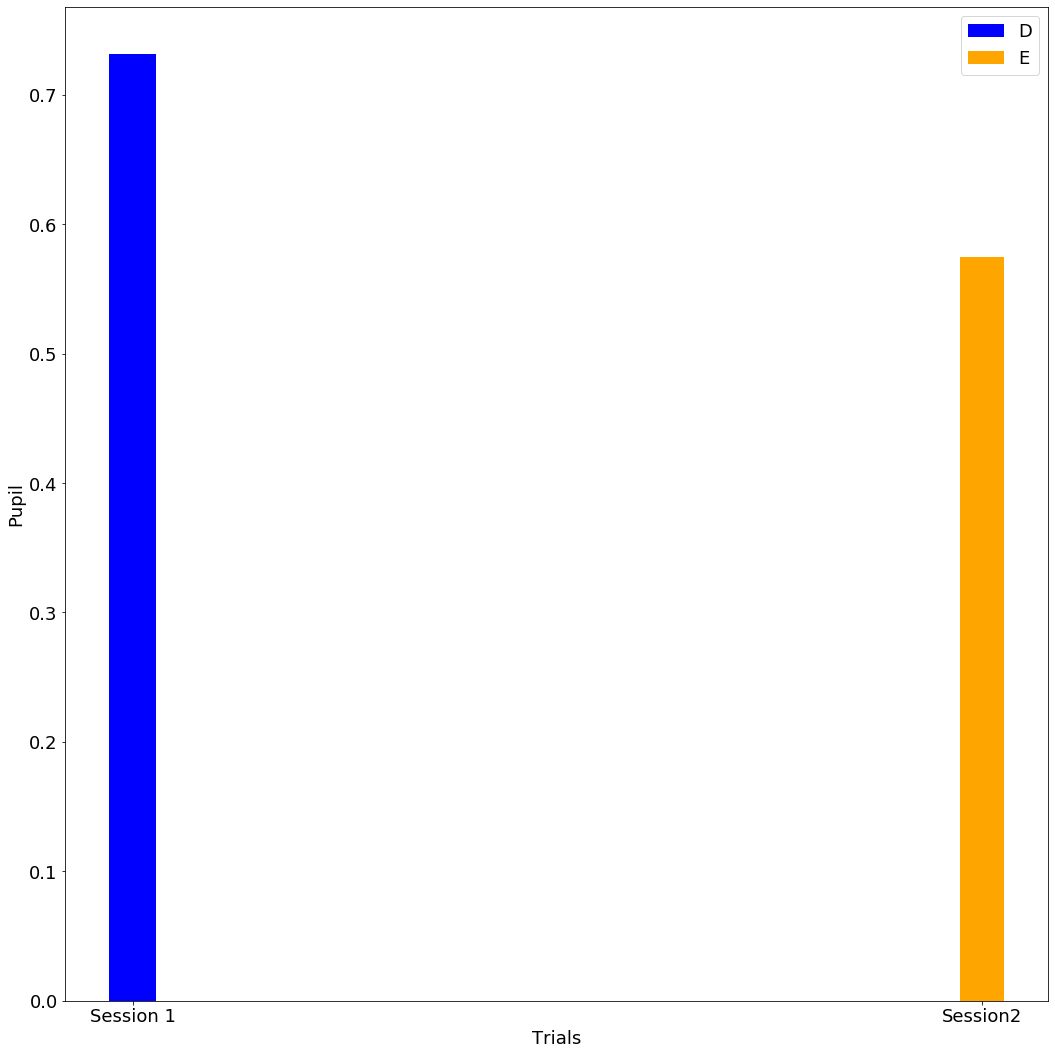

In [41]:


variable = 'PupilRelative_readingMax'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




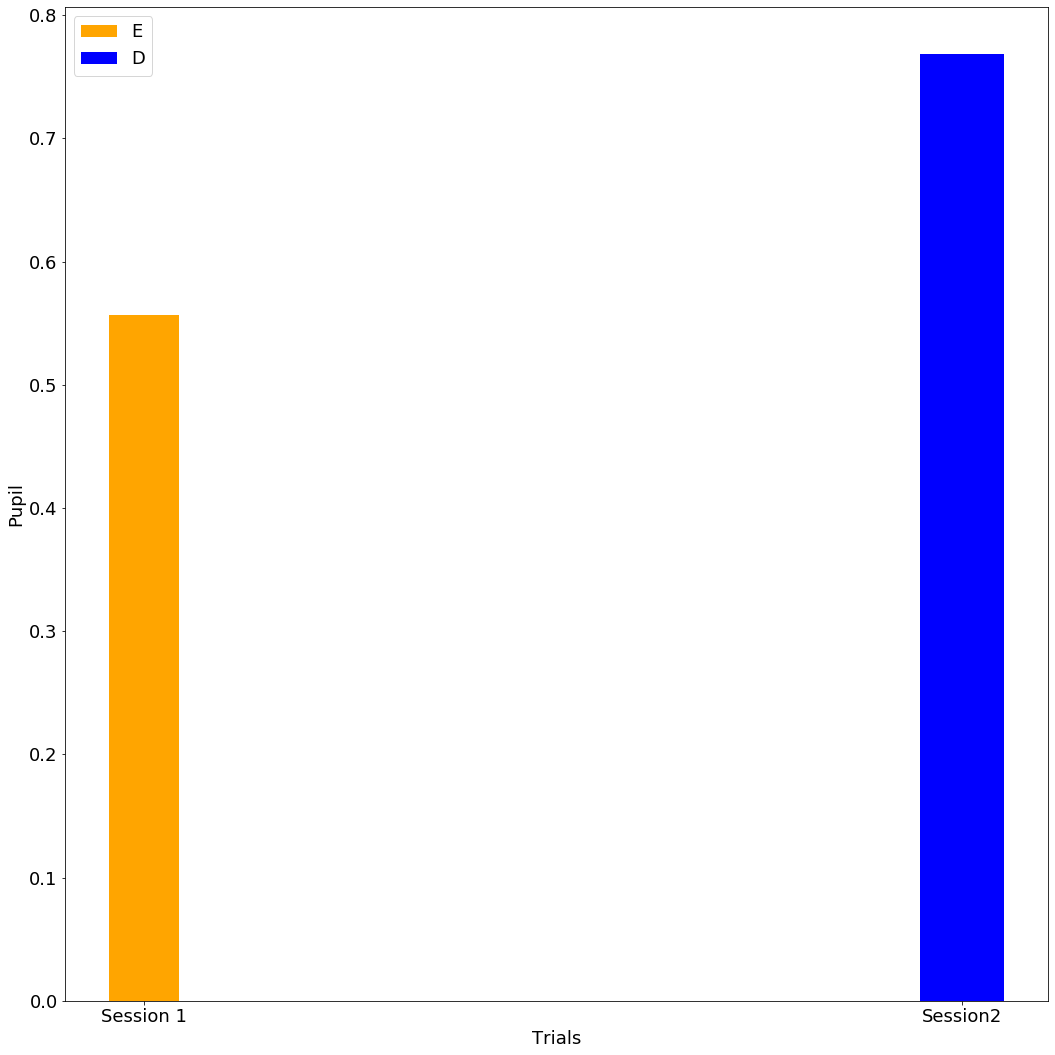

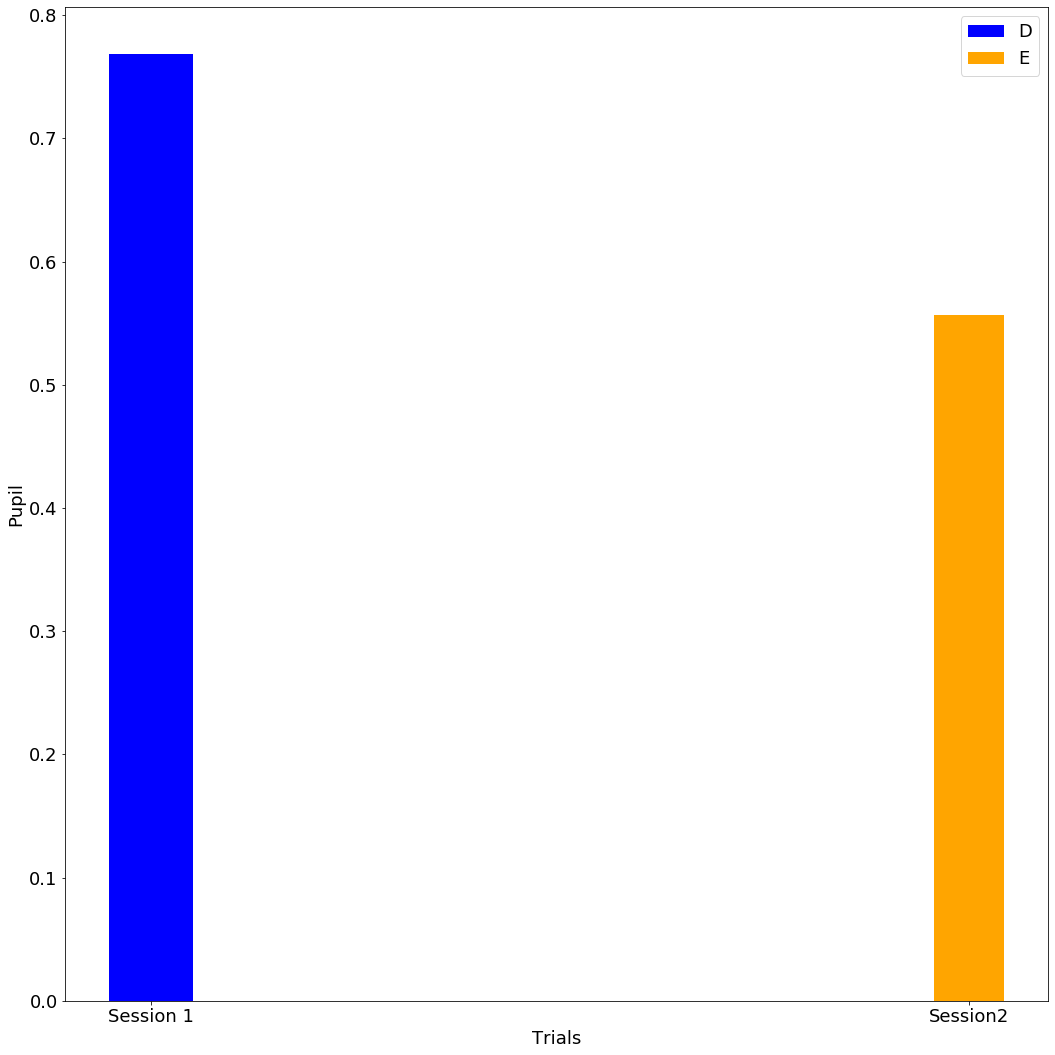

In [48]:


variable = 'PupilRelative_readingMax'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][\
                    np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='DT',\
                    df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.2, df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(\
                    df1.TypingTechnique=='DT', df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilReading_max_SessionDifficulty.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




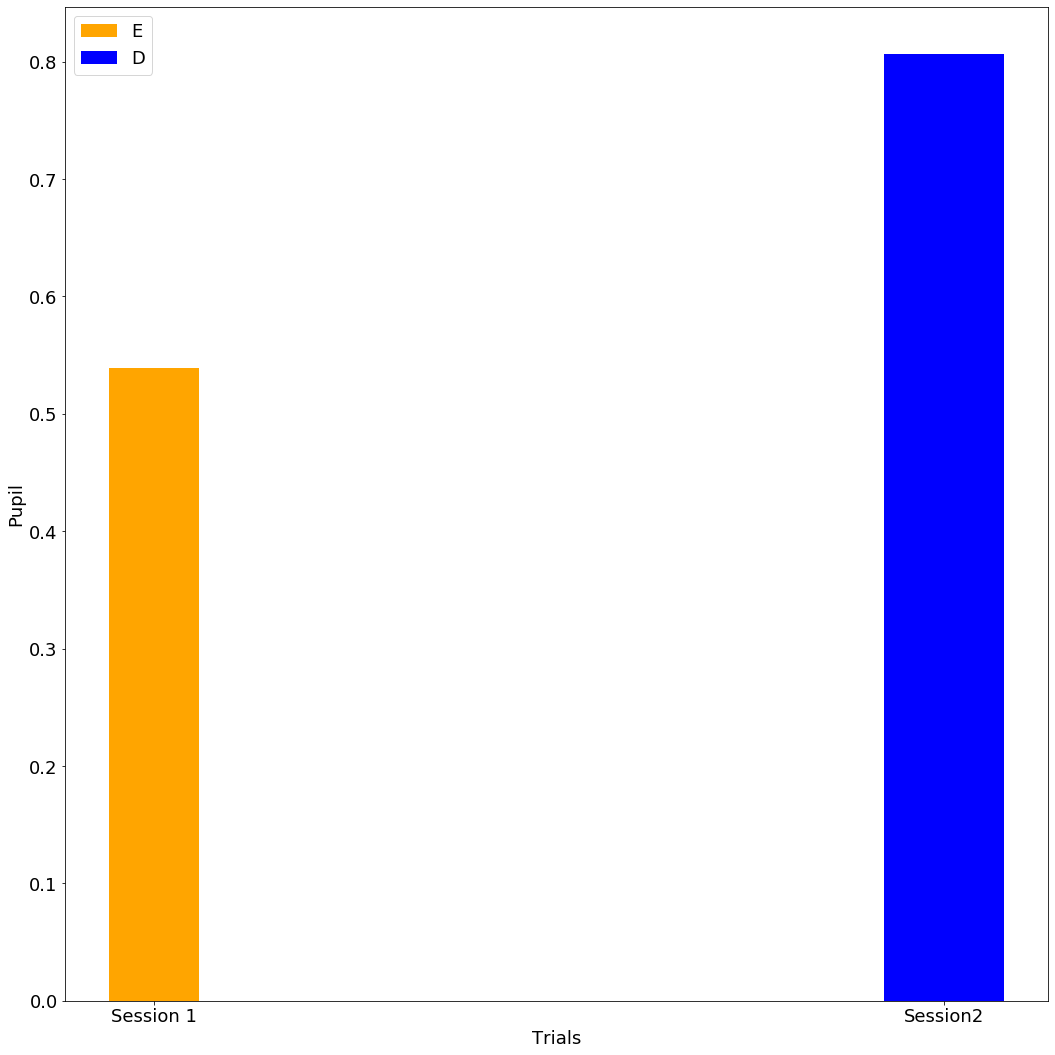

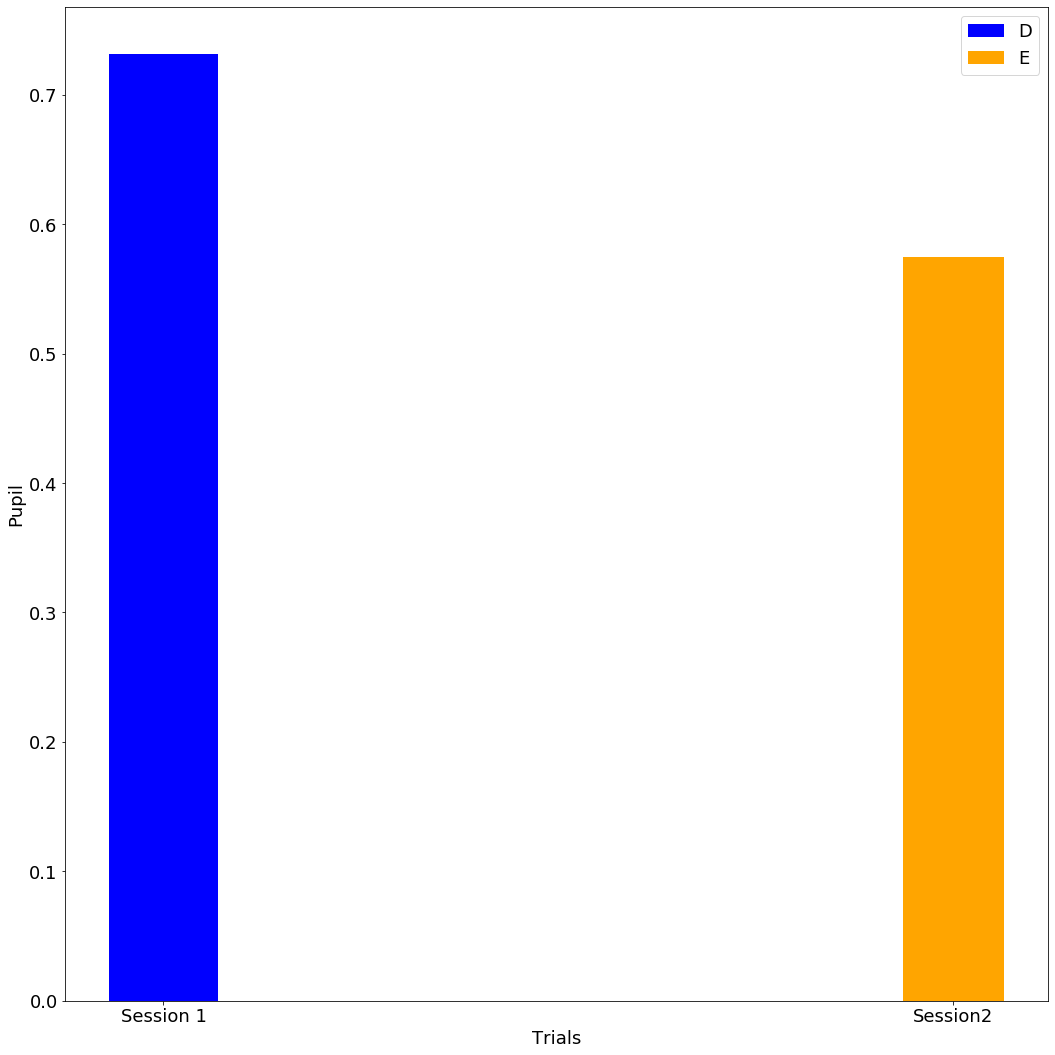

In [47]:


variable = 'PupilRelative_readingMax'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.2, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.2])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilReading_max_Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




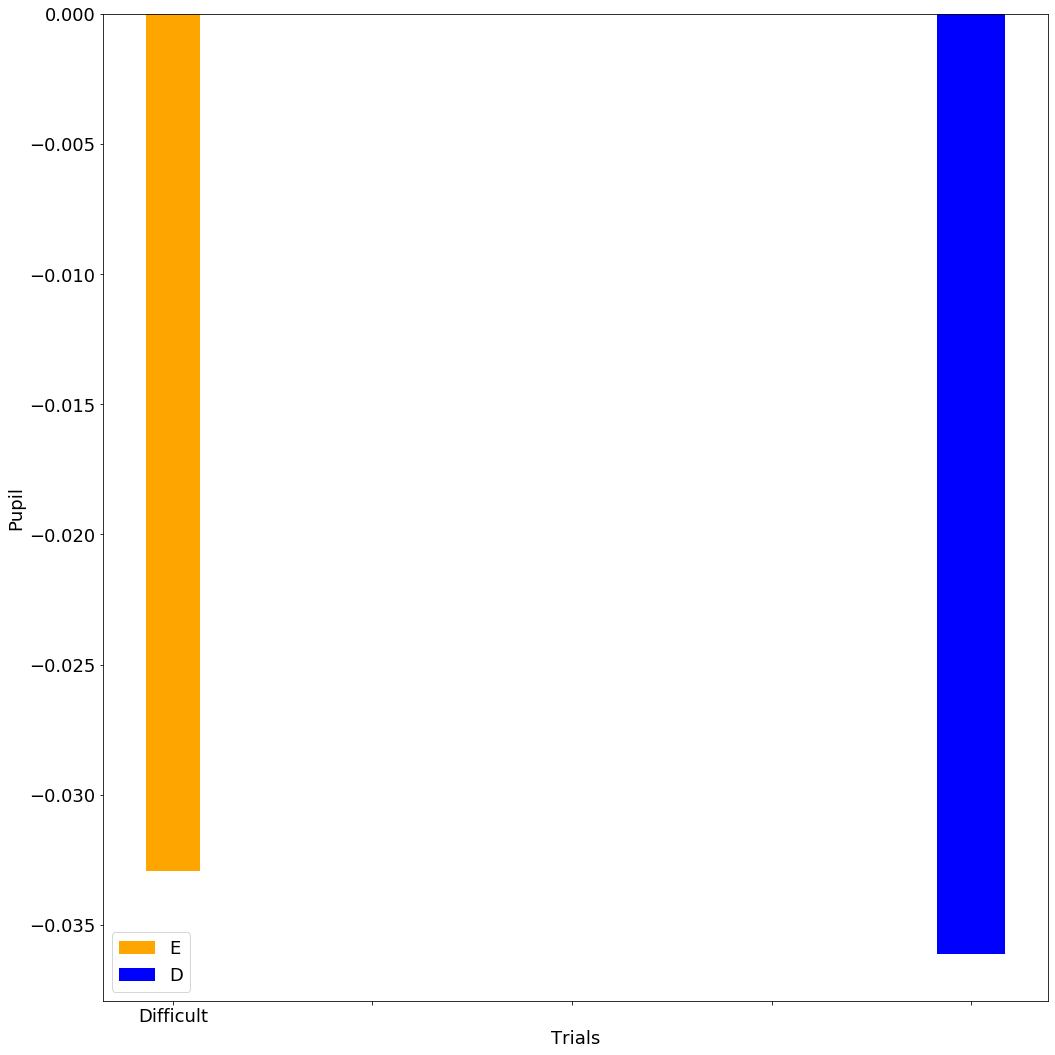

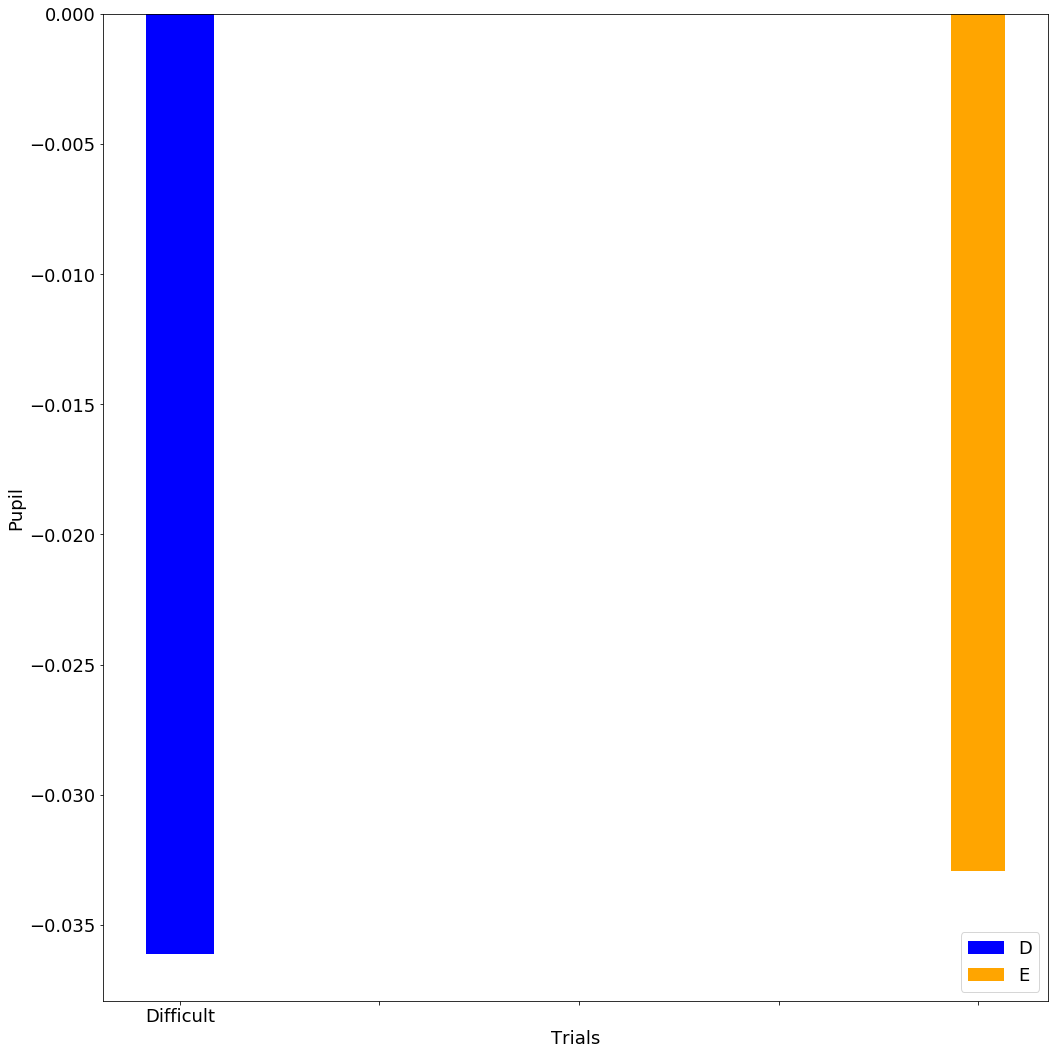

In [51]:


variable = 'PupilRelative_writingMedian'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][\
                    np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='DT',\
                    df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.2, df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(\
                    df1.TypingTechnique=='DT', df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(df1.TypingTechnique=='DT', \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    #ax1.set_xticks([1,1.2])
    ax1.set_xticklabels(['Easy', 'Difficult'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\Fatigue\PupilReading_median_SessionDifficulty.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




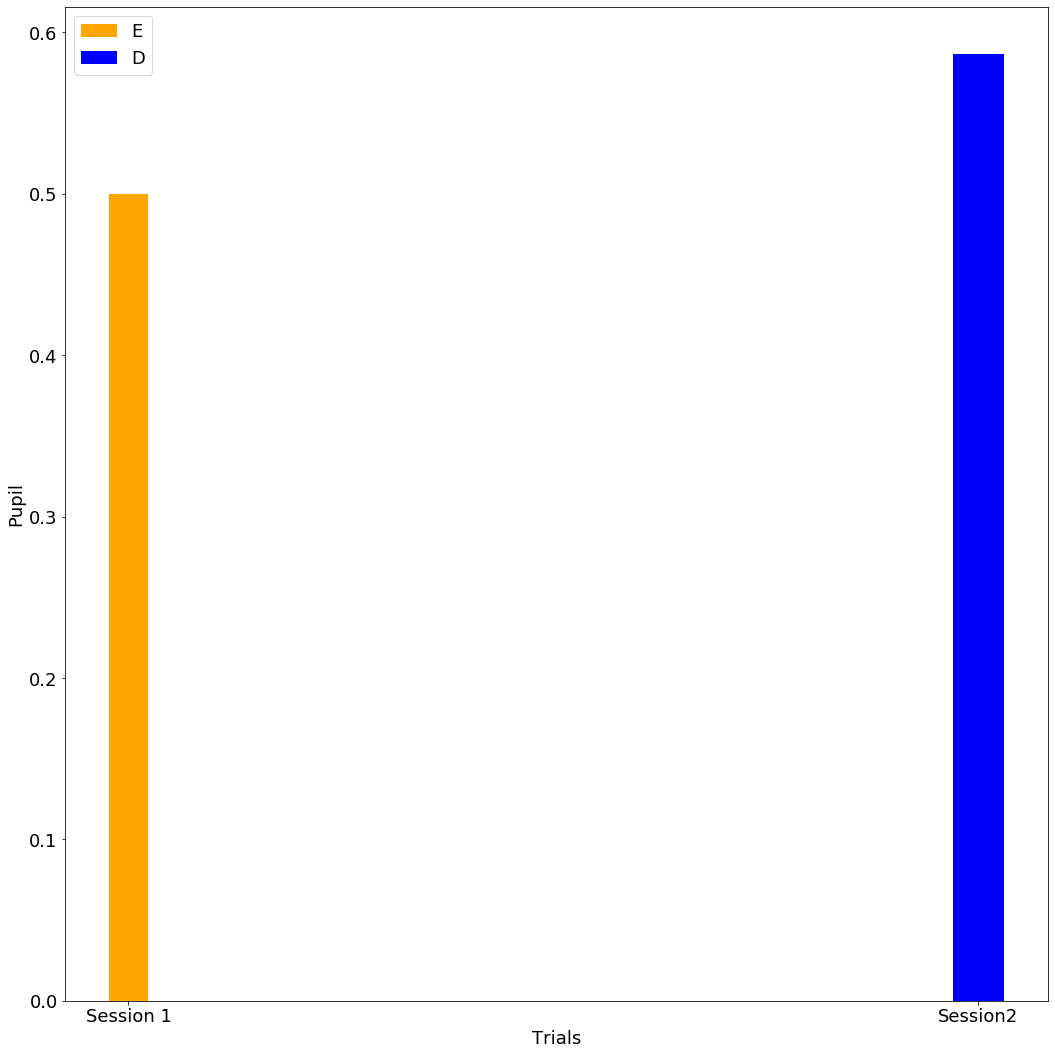

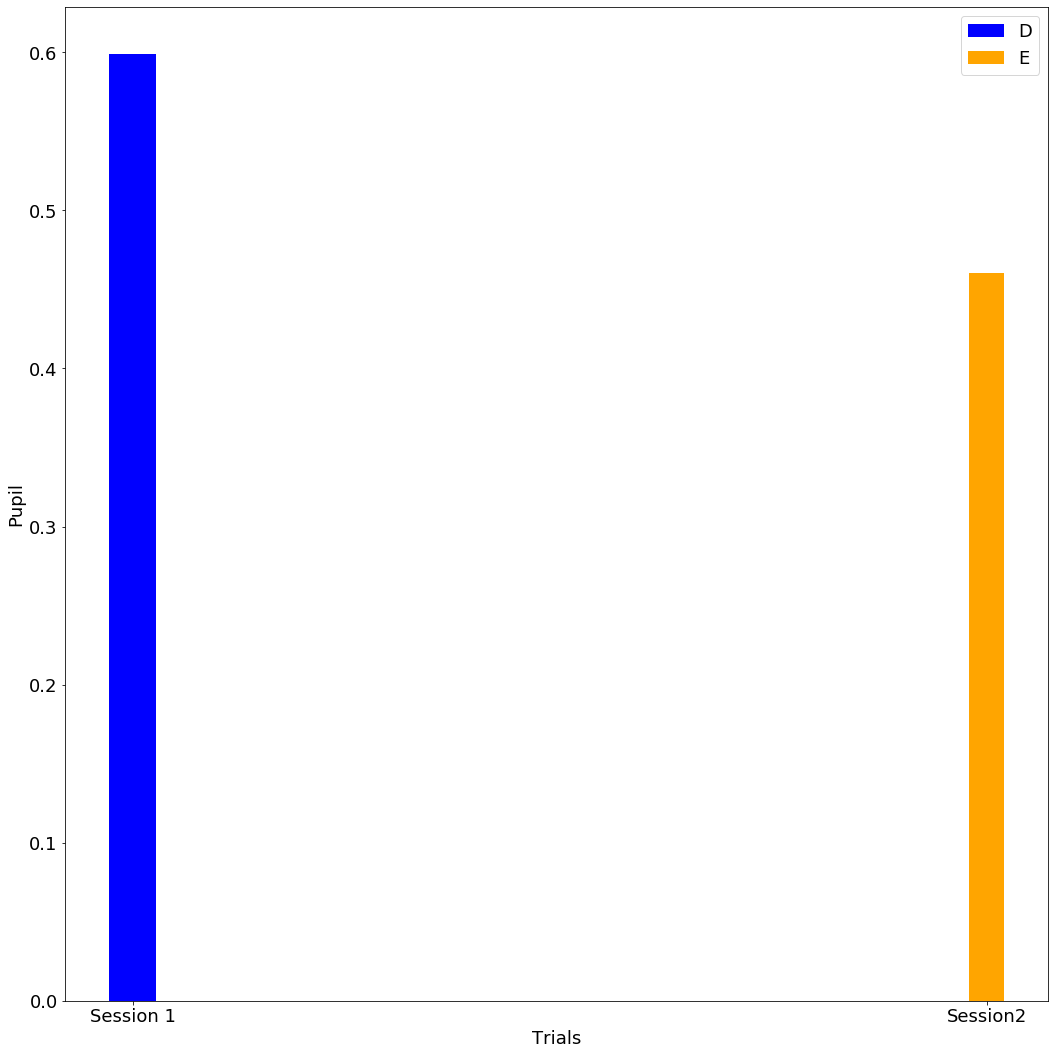

In [43]:


variable = 'PupilRelative_writingMax'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




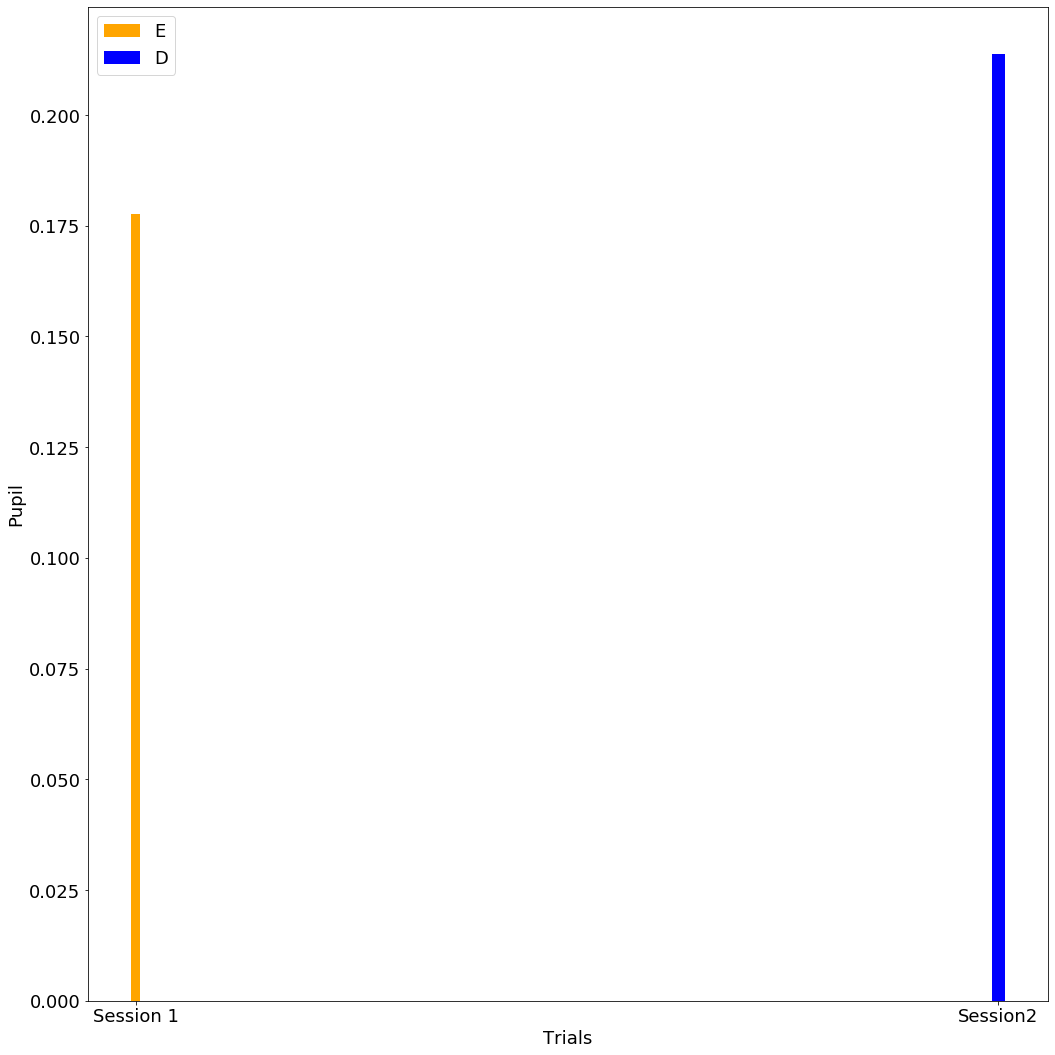

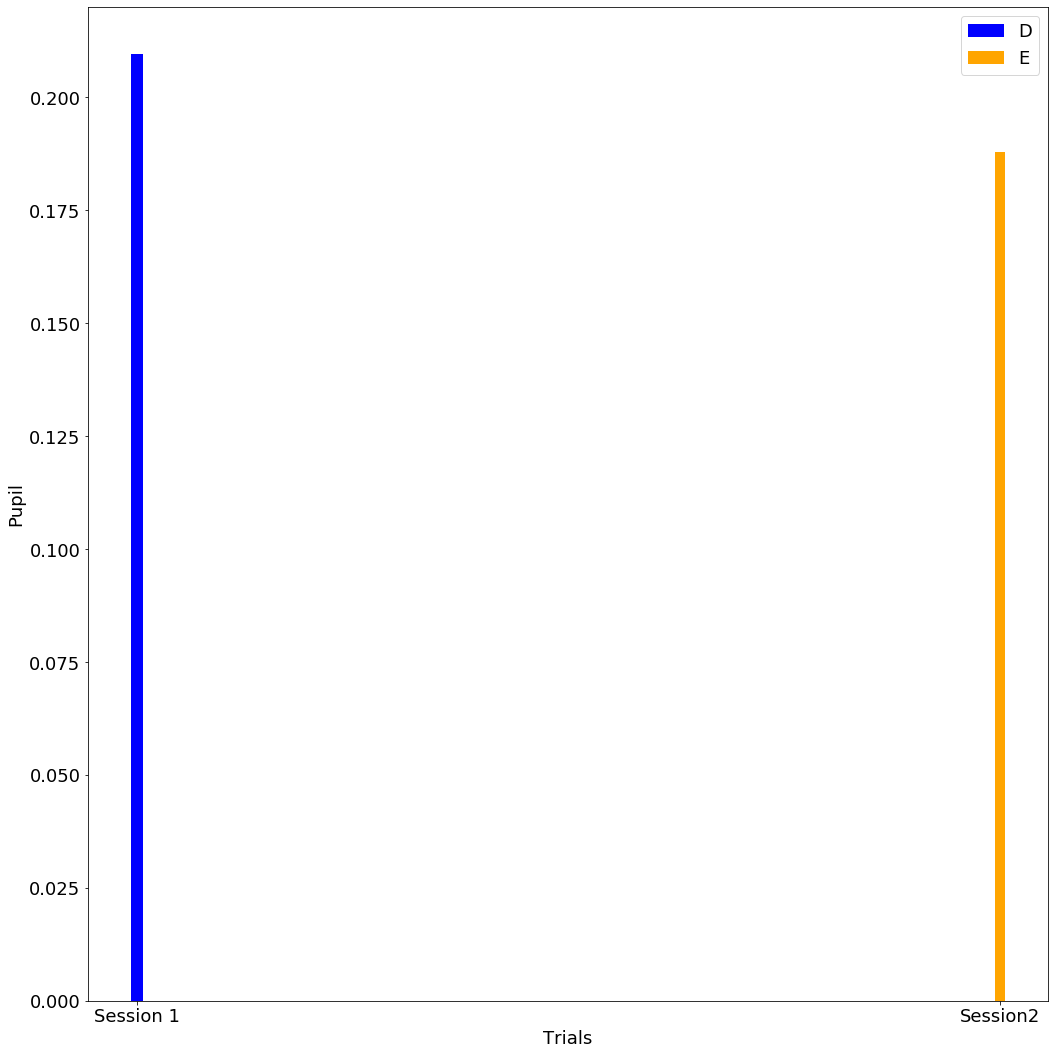

In [30]:


variable = 'PupilStdLeft'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




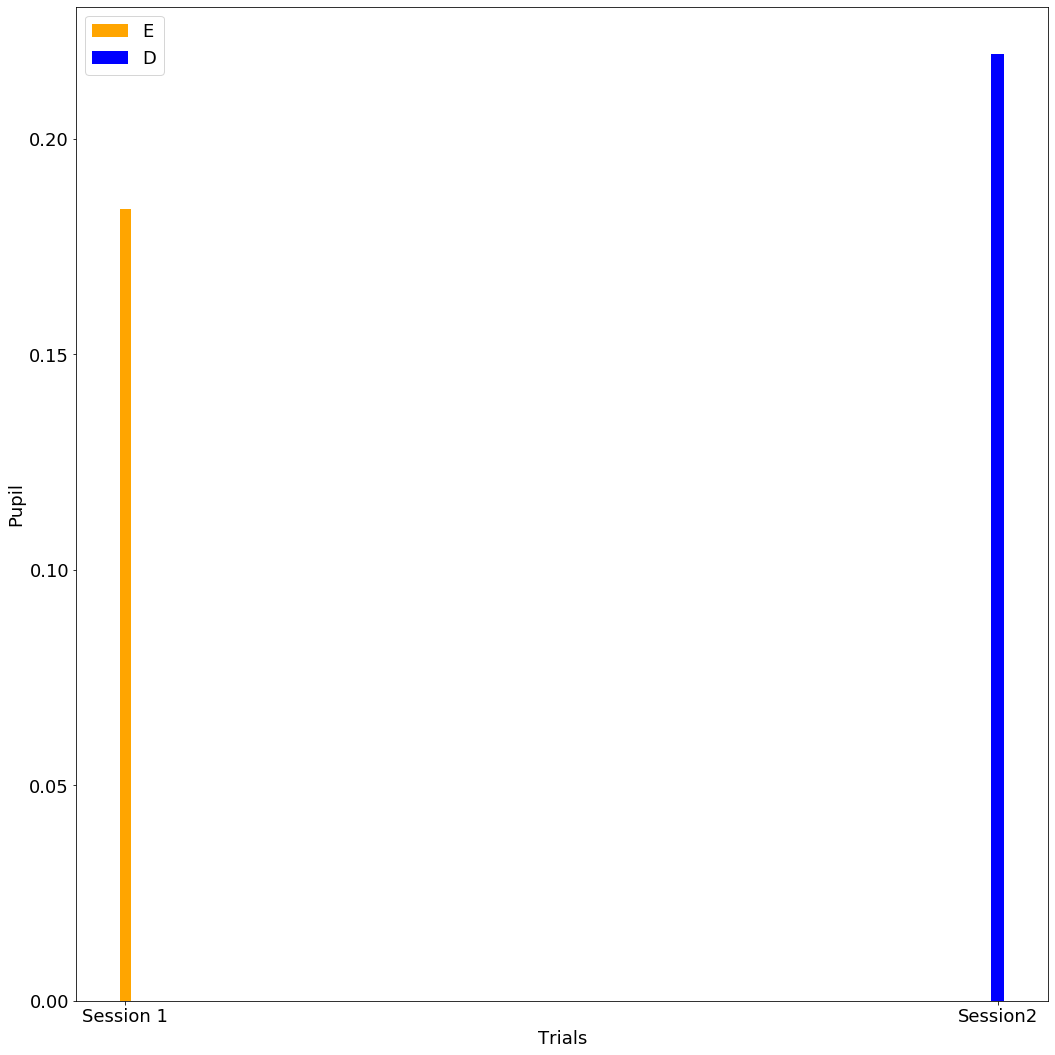

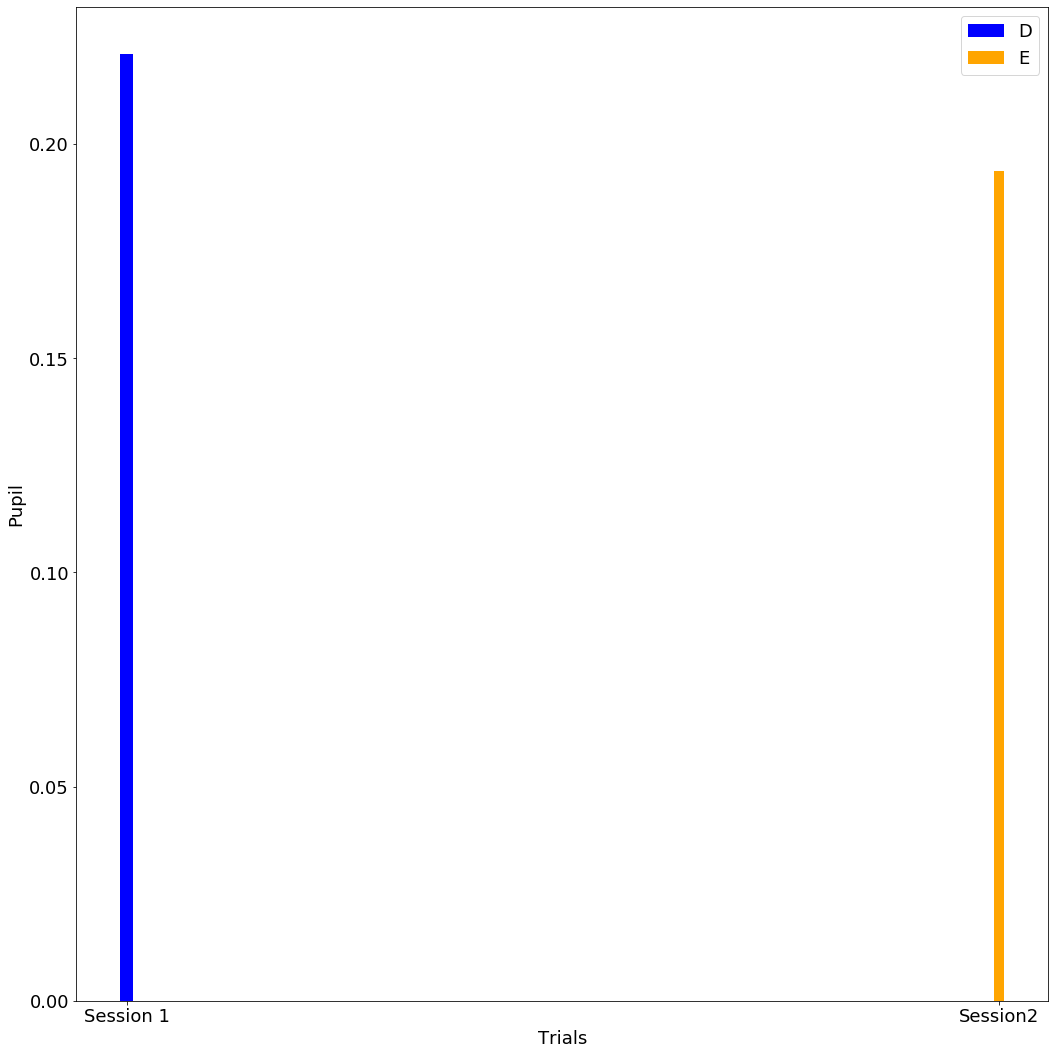

In [31]:


variable = 'PupilStdRight'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'
colorList = ['orange', 'blue']

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    
    
    p1 = ax1.bar(1, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), \
                    df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(\
                    np.logical_and(df1.TypingTechnique=='DT', df1.Session==1), df1.SessionDifficulty==session1Difficulty)\
                    ].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT',\
                    df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())),color = colorList[0])
    p2 = ax1.bar(1.5, df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(\
                    df1.TypingTechnique=='DT', df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/\
                    (np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Session==2), \
                    df1.SessionDifficulty==session2Difficulty)].count())), color = colorList[1])
    
    
    ax1.set_ylabel('Pupil')
    ax1.set_xlabel('Trials')
    ax1.set_xticks([1,1.5])
    ax1.set_xticklabels(['Session 1', 'Session2'])
    #ax1.set_ylim([-0.13, 0])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    ax1.legend((p1,p2), (session1Difficulty, session2Difficulty))
    
    plt.tight_layout()
    #savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilAbsolute_baseline_TimeOnTask_' + 'Session1_' + \
    #session1Difficulty + '.png' 
    ##fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    colorList = ['blue', 'orange']
    
    




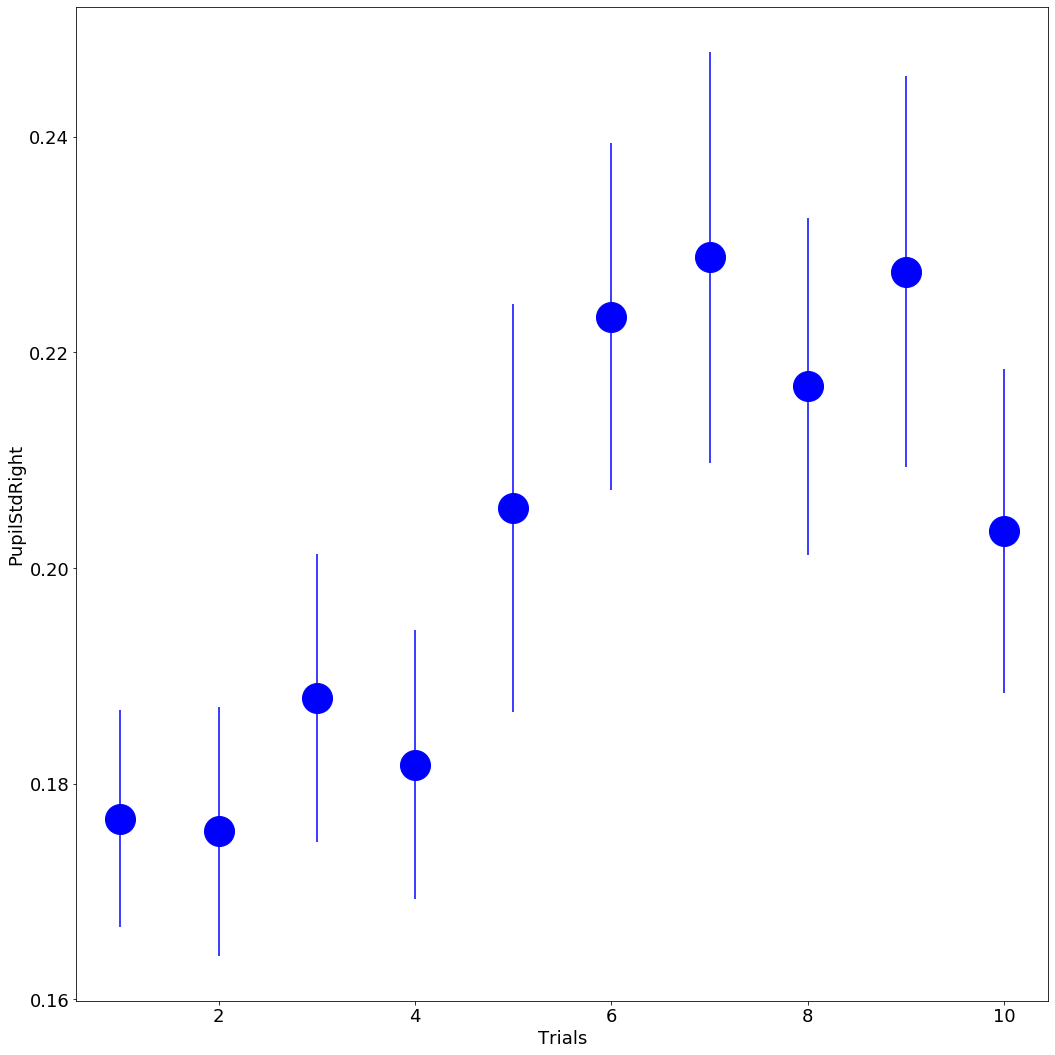

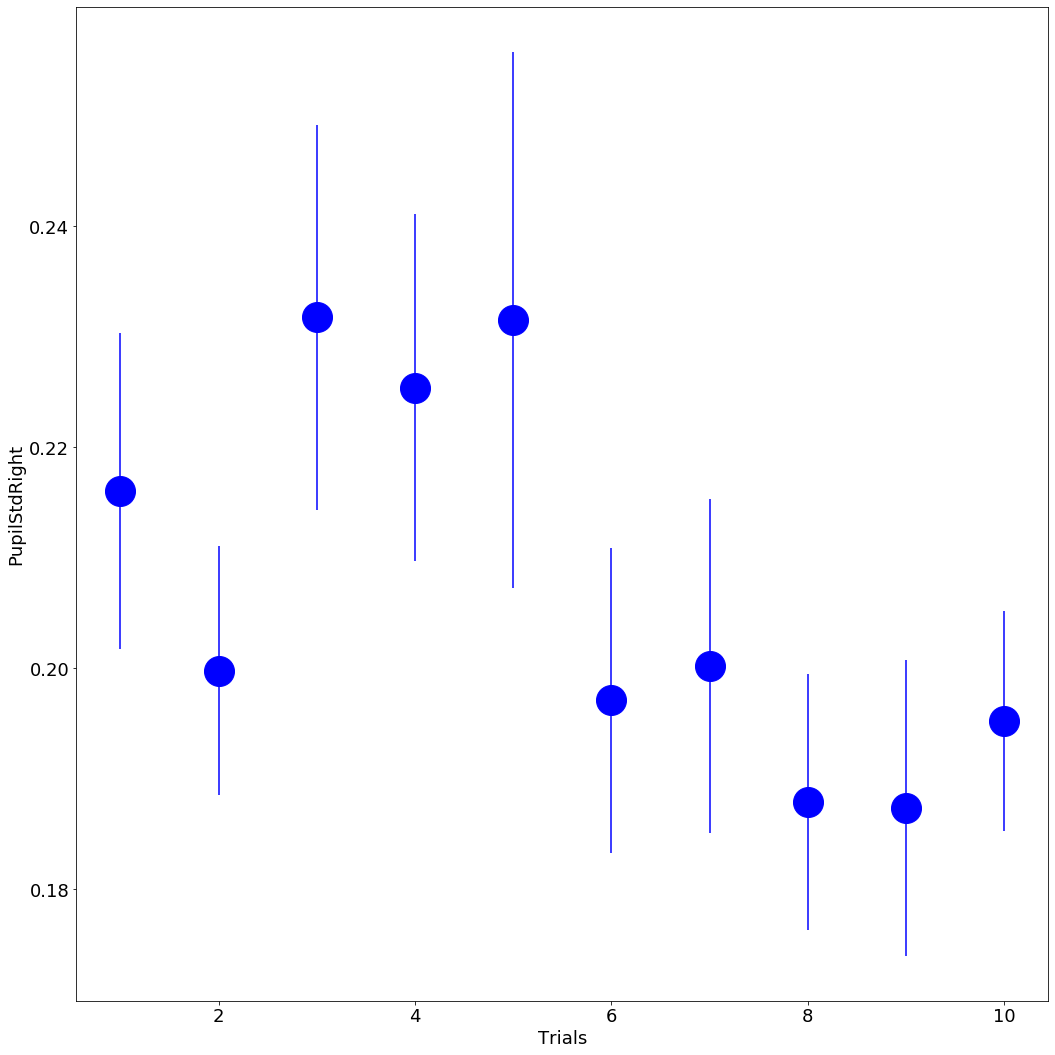

In [14]:


variable = 'PupilStdRight'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('PupilStdRight')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([4.4, 5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilStdRight_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    




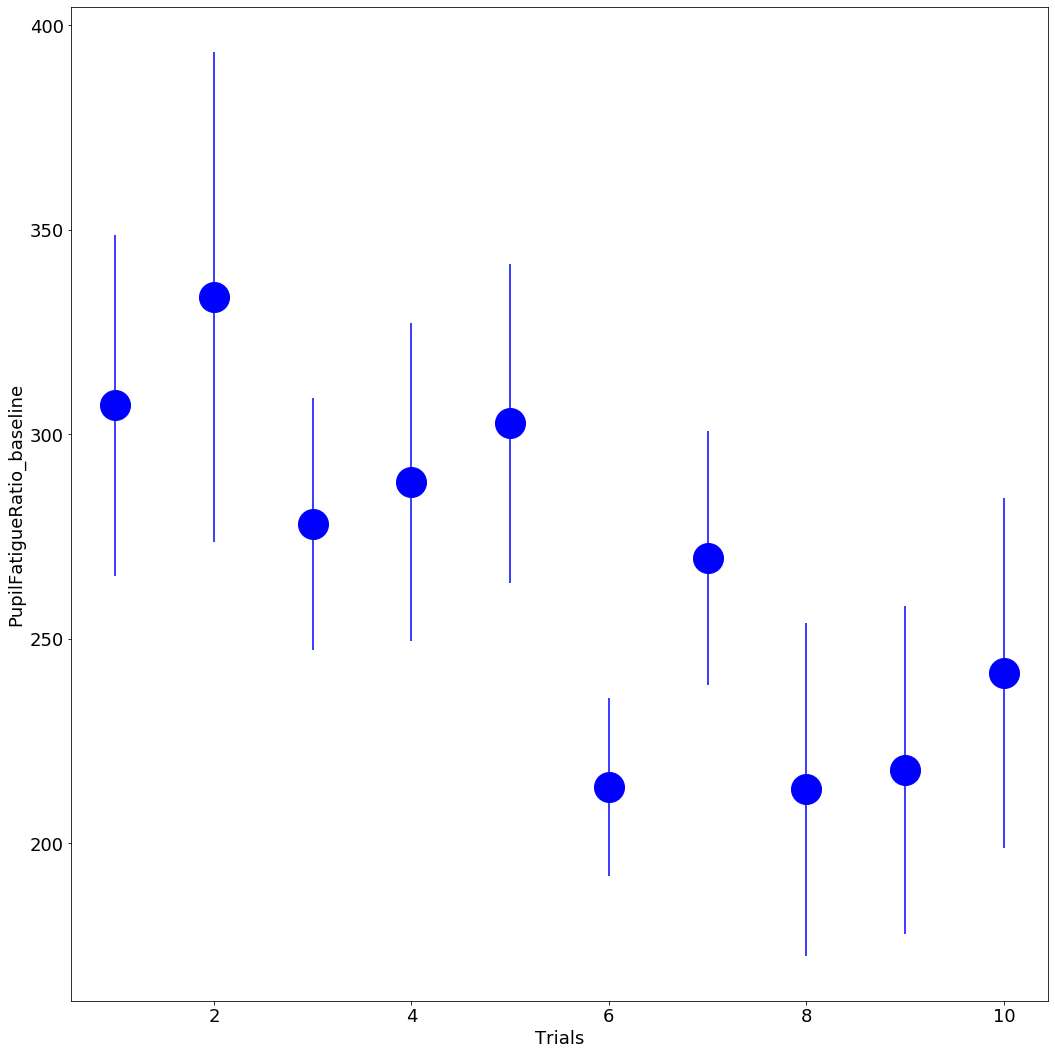

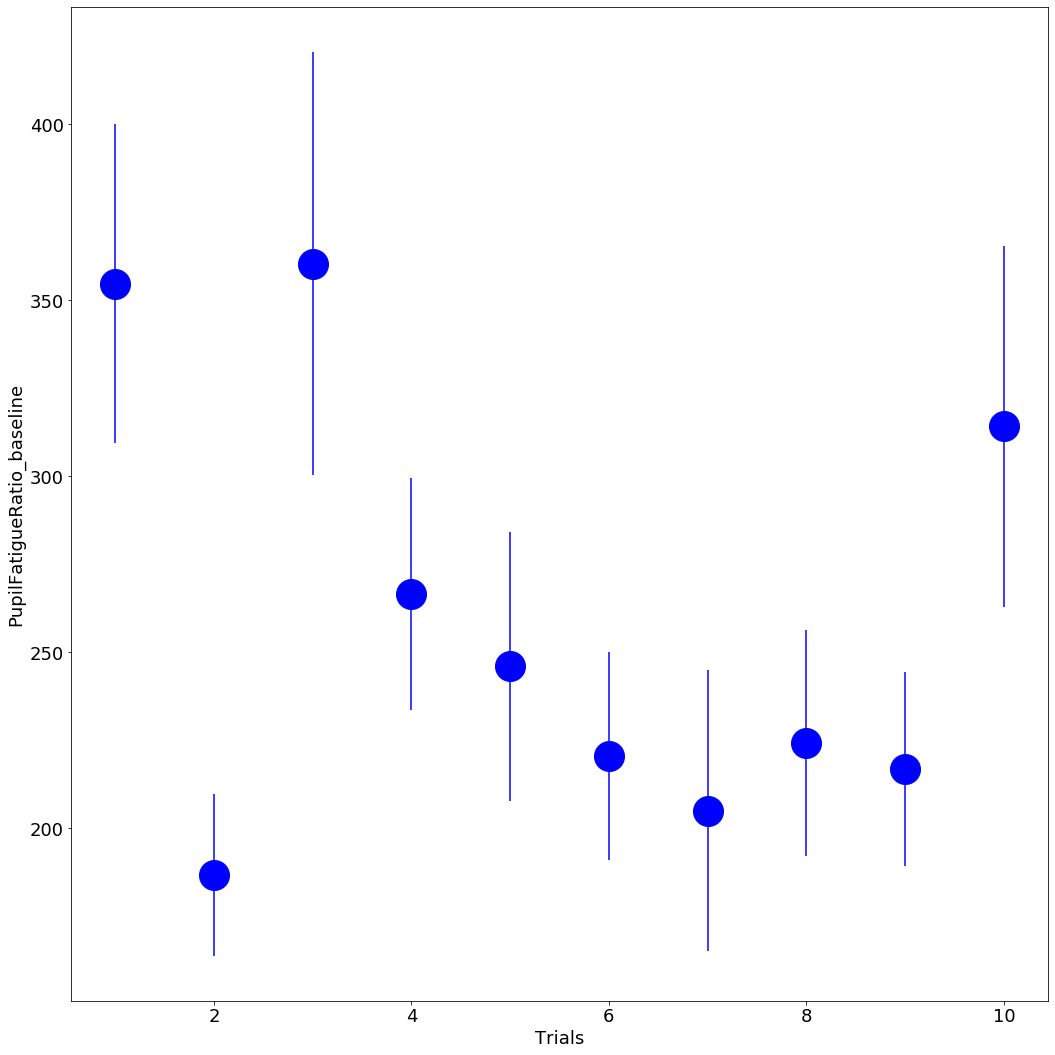

In [15]:


variable = 'PupilFatigueRatio_baseline'


timeOnTask = [0, 1, 2, 3, 4]
DayDT = [0,1,2,3]

label_fontSize = 18
others_fontSize = 12


session1Difficulty = 'E'
session2Difficulty = 'D'

for i in range(0,2):
    
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(1,1,1)
    
    for ind, trial in enumerate(np.unique(df1.Trial)):
        
        if trial > 4:
            continue
    
        p1 = ax1.errorbar(trial+1, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==1), df1.SessionDifficulty==session1Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
        p2 = ax1.errorbar(trial+6, df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].mean(), df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].std()/(np.sqrt(df1[variable][np.logical_and(np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Trial==\
                    trial), df1.Session==2), df1.SessionDifficulty==session2Difficulty)].count())), marker = 'o', ms=30, color = 'blue')
    
    
    ax1.set_ylabel('PupilFatigueRatio_baseline')
    ax1.set_xlabel('Trials')
    #ax1.set_ylim([4.4, 5])
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': label_fontSize})
    
    plt.tight_layout()
    savefilename = r'C:\DTU\Results\201901_Expt\2020FatigueResults\PupilFatigueRatio_baseline_TimeOnTask_' + 'Session1_' + \
    session1Difficulty + '.png' 
    fig.savefig(savefilename, dpi = 300, bbox_to_anchor = (0.95, 0.1))
    session1Difficulty = 'D'
    session2Difficulty = 'E'
    
    




In [ ]:
df1.PupilFatigueRatio_baseline

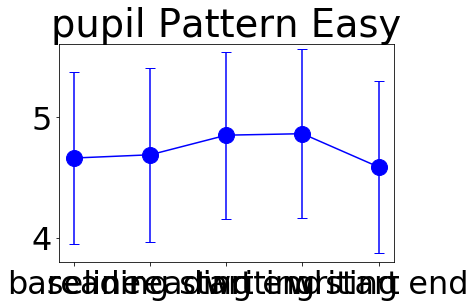

In [11]:
PlotTitle = 'pupil Pattern Easy'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

list1 = list()
for ind, variable in enumerate(plot_variables):
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std(), fmt='-ob', capsize=5)
ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4,5])
ax1.set_ylim([3.8, 5.6])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

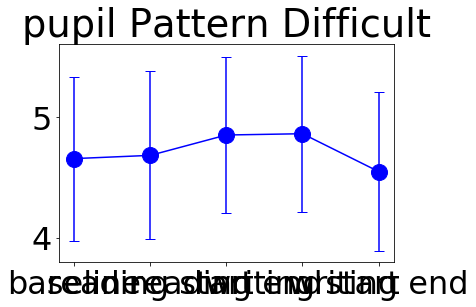

In [12]:
PlotTitle = 'pupil Pattern Difficult'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilAbsolute_baseline', 'PupilAbsolute_readingStart', 'PupilAbsolute_readingEnd',\
                 'PupilAbsolute_writingStart', 'PupilAbsolute_writingEnd']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

list1 = list()
for ind, variable in enumerate(plot_variables):
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std(), fmt='-ob', capsize=5)
ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4,5])
ax1.set_ylim([3.8, 5.6])
ax1.set_xticklabels(['baseline', 'reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

# Box plots of relative reading and writing pupil size

In [17]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils_startEnd.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]


DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])






variable = 'PupilRelative_readingStart'

# sDiff
print(variable)
rs_e_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')]))
rs_e_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')])))
rs_d_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')]))
rs_d_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')])))

# Phase
rs_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')]))
rs_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')])))




variable = 'PupilRelative_readingEnd'

# sDiff
print(variable)
re_e_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')]))
re_e_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')])))
re_d_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')]))
re_d_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')])))

# Phase
re_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')]))
re_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')])))




variable = 'PupilRelative_writingStart'

# sDiff
print(variable)
ws_e_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')]))
ws_e_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='E')])))
ws_d_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')]))
ws_d_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S'), df1.SessionDifficulty=='D')])))

# Phase
ws_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')]))
ws_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='S')])))




variable = 'PupilRelative_writingEnd'

# sDiff
print(variable)
we_e_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')]))
we_e_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='E')])))
we_d_m = (np.mean(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')]))
we_d_s = (np.std(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E'), df1.SessionDifficulty=='D')])))

# Phase
we_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')]))
we_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Phase=='E')])))



#sDiff
sDiff_e_m = [rs_e_m, re_e_m, ws_e_m, we_e_m]
sDiff_e_s = [rs_e_s, re_e_s, ws_e_s, we_e_s]

sDiff_d_m = [rs_d_m, re_d_m, ws_d_m, we_d_m]
sDiff_d_s = [rs_d_s, re_d_s, ws_d_s, we_d_s]

print('sDiff')
print(sDiff_e_m)
print(np.mean(sDiff_e_m), np.mean(sDiff_e_s))
print(sDiff_d_m)
print(np.mean(sDiff_d_m), np.mean(sDiff_d_s))


print('Phases')
print('rs: ', rs_m, rs_s)

print('re: ', re_m, re_s)

print('ws: ', ws_m, ws_s)

print('we: ', we_m, we_s)


PupilRelative_readingStart
PupilRelative_readingEnd
PupilRelative_writingStart
PupilRelative_writingEnd
sDiff
[0.006917886337748712, 0.18795267321634543, 0.20130312189921057, -0.08981339358298787]
0.07659007196757919 0.014238467590203075
[0.012773848551304137, 0.2081539960018074, 0.21696221096553348, -0.10545928170906486]
0.08310769345239503 0.017835171726640335
Phases
rs:  0.009845867444526427 0.007594148184106275
re:  0.19805333460907626 0.012752558084990165
ws:  0.20913266643237202 0.012393671290901848
we:  -0.09763633764602644 0.012945811167944934


In [7]:
df1

,0,Subject,Day,DayDT,Language,Session,SessionDifficulty,Trial,ScoreDifficulty,Phases,PupilRelative_writingSectionsMean,PupilRelative_writingSectionsMin,PupilRelative_writingSectionsMax,DayNr,TypingTechnique,Correlation
0,1,ac,1,1,EN,1,E,0,4.0,1,"[0.33115174437572614, 0.04954666066835115, -0....","[0.04557026774232309, -0.2846832225274625, -0....","[0.576497707131022, 0.41013492367616156, 0.158...",1,DT,0.884633
1,1,ac,1,1,EN,1,E,0,4.0,2,"[0.33115174437572614, 0.04954666066835115, -0....","[0.04557026774232309, -0.2846832225274625, -0....","[0.576497707131022, 0.41013492367616156, 0.158...",1,DT,0.884633
2,1,ac,1,1,EN,1,E,0,4.0,3,"[0.33115174437572614, 0.04954666066835115, -0....","[0.04557026774232309, -0.2846832225274625, -0....","[0.576497707131022, 0.41013492367616156, 0.158...",1,DT,0.884633
3,1,ac,1,1,EN,1,E,0,4.0,4,"[0.33115174437572614, 0.04954666066835115, -0....","[0.04557026774232309, -0.2846832225274625, -0....","[0.576497707131022, 0.41013492367616156, 0.158...",1,DT,0.884633
4,2,ac,1,1,EN,1,E,1,3.0,1,"[0.38838448978236917, 0.2943381850695124, 0.23...","[0.06569159187089291, 0.037863810300055256, -0...","[0.6842729229662323, 0.5373497603194322, 0.536...",1,DT,0.884633
5,2,ac,1,1,EN,1,E,1,3.0,2,"[0.38838448978236917, 0.2943381850695124, 0.23...","[0.06569159187089291, 0.037863810300055256, -0...","[0.6842729229662323, 0.5373497603194322, 0.536...",1,DT,0.884633
6,2,ac,1,1,EN,1,E,1,3.0,3,"[0.38838448978236917, 0.2943381850695124, 0.23...","[0.06569159187089291, 0.037863810300055256, -0...","[0.6842729229662323, 0.5373497603194322, 0.536...",1,DT,0.884633
7,2,ac,1,1,EN,1,E,1,3.0,4,"[0.38838448978236917, 0.2943381850695124, 0.23...","[0.06569159187089291, 0.037863810300055256, -0...","[0.6842729229662323, 0.5373497603194322, 0.536...",1,DT,0.884633
8,3,ac,1,1,EN,1,E,2,3.0,1,"[0.24234434470964145, 0.2820803518335826, 0.32...","[0.0619590674055317, 0.0599474797256212, -0.06...","[0.4902808096473077, 0.5442231617923614, 0.659...",1,DT,0.884633
9,3,ac,1,1,EN,1,E,2,3.0,2,"[0.24234434470964145, 0.2820803518335826, 0.32...","[0.0619590674055317, 0.0599474797256212, -0.06...","[0.4902808096473077, 0.5442231617923614, 0.659...",1,DT,0.884633


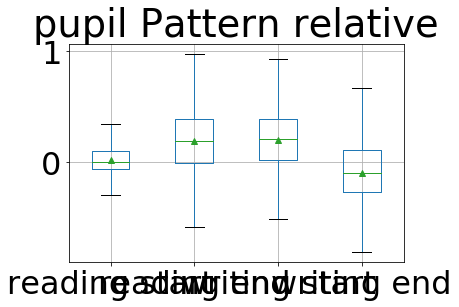

In [13]:
PlotTitle = 'pupil Pattern relative'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_readingStart', 'PupilRelative_readingEnd',\
                 'PupilRelative_writingStart', 'PupilRelative_writingEnd']


boxplot = df1.boxplot(column=plot_variables, sym='', positions=None, widths=None, \
        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#list1 = list()
#for ind, variable in enumerate(plot_variables):
#    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
#    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
#                 df1[variable][df1.SessionDifficulty=='E'].std(), fmt='-ob', capsize=5)
#ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
#ax1.set_ylim([3.8, 5.6])
ax1.set_xticklabels(['reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

In [18]:
PlotTitle = 'pupil Pattern'
fig = plt.figure(figsize=[15,12])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_readingStart', 'PupilRelative_readingEnd',\
                 'PupilRelative_writingStart', 'PupilRelative_writingEnd']


x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable].mean())
    x_list1.append(x_inds[ind])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==1)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==1)].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==1)].count()),\
                 color='blue', width=0.5)
    p2 = ax1.bar(x_inds[ind]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==1)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==1)].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==1)].count()),\
                 color='orange', width=0.5)
    
#ax1.plot(x_list1, list1, '-.', color='k')

ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
#ax1.set_ylim([4.5, 5])
ax1.set_xticklabels(['reading start', 'reading end', 'writing start', 'writing end'], rotation = 10)
plt.rcParams.update({'font.size': 32})
ax1.set_ylabel('Pupil size [in mm]')
ax1.legend((p1, p2), ('Easy', 'Difficult'))
plt.grid('on')
plt.tight_layout()


fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\pupilRelativeDay1_patternZoom.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [199]:
PlotTitle = 'pupil Pattern Easy'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_readingStart', 'PupilRelative_readingEnd',\
                 'PupilRelative_writingStart', 'PupilRelative_writingEnd']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

list1 = list()
for ind, variable in enumerate(plot_variables):
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std(), fmt='-ob', capsize=5)
ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

In [200]:
PlotTitle = 'pupil Pattern Difficult'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_readingStart', 'PupilRelative_readingEnd',\
                 'PupilRelative_writingStart', 'PupilRelative_writingEnd']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

list1 = list()
for ind, variable in enumerate(plot_variables):
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    ax1.errorbar(ind+1, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std(), fmt='-ob', capsize=5)
ax1.plot(range(1,ind+2), list1, '-ob', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['reading start', 'reading end', 'writing start', 'writing end'])
plt.rcParams.update({'font.size': 32})

In [9]:
PlotTitle = 'pupil Pattern'
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_readingStart', 'PupilRelative_readingEnd',\
                 'PupilRelative_writingStart', 'PupilRelative_writingEnd']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 4.5, 8, 11.5]
x_inds2 = [1.2, 4.7, 8.2, 11.7]
list1, list1_std, list2, list2_std = list(), list(), list(), list()
x_list1, x_list2 = list(), list()


for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1_std.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(len(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')])))
    list2.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    list2_std.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(len(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')])))
    
    
    #x_list2.append(x_inds[ind]+0.8)
    #p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 #df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    #p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 #df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#p1 = ax1.plot(x_list1, list1, '-.', color='blue', markersize = 16, marker='o', linewidth = 6)
#p2 = ax1.plot(x_list1, list2, color='orange', markersize = 16, marker = '^', linewidth = 6)
p1 = ax1.errorbar(x_inds, list1, yerr=list1_std, linestyle='-.', color='blue', marker='o', linewidth = 5, markersize=20, elinewidth=5, capsize=5)    
p2 = ax1.errorbar(x_inds2, list2, yerr=list2_std, color='orange', marker = '^', linewidth = 5, markersize=20, elinewidth=5, capsize=5)

ax1.set_xticks([1.1,4.6,8.1,11.6])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['reading \n start', 'reading \n end', 'writing \n start', 'writing \n end'])
ax1.set_ylabel('Relative pupil size [mm]')
ax1.set_xlabel('Phases')
plt.rcParams.update({'font.size': 52})
ax1.legend((p1[0], p2[0]), ('Easy', 'Difficult'), frameon=False)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\pupilRelative_pattern.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [33]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/np.sqrt(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))



# annotate with significance level
maxTime = 0.25
y_time, h, col = maxTime, 0.01, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.01, "n.s", ha='center', va='bottom', color=col, fontsize = others_fontSize)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Only dwell-time selection

In [34]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart_DT.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [17]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='MS')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='MS')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='MS')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='MS')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='MS')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='MS')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='MS')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='MS')].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart_MS.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Language

In [58]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## PupilwritingStart over Sessions

In [62]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 72
others_fontSize = 62

#x_inds = [1, 2, 3, 4]
x_inds = [1,2]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.Session==1].mean())
    list1.append(df1[variable][df1.Session==2].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.Session==1].mean(), yerr = \
                 df1[variable][df1.Session==1].std()/np.sqrt(df1[variable][df1.Session==1].count()), color='gray', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.Session==2].mean(), yerr = \
                 df1[variable][df1.Session==2].std()/np.sqrt(df1[variable][df1.Session==2].count()), color='gray', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session1', 'Session2'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [11]:
df1[df1.DayDT==4].boxplot(by='ScoreDifficulty', column='PupilRelative_writingStart', showmeans=True)

## Typing technique

In [10]:
PlotTitle = 'PupilRelative_writingStart'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingStart']


label_fontSize = 72
others_fontSize = 62

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.TypingTechnique=='DT'].mean())
    list1.append(df1[variable][df1.TypingTechnique=='MS'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.TypingTechnique=='DT'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='DT'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='DT'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][df1.TypingTechnique=='MS'].mean(), yerr = \
                 df1[variable][df1.TypingTechnique=='MS'].std()/np.sqrt(df1[variable][df1.TypingTechnique=='MS'].count()), color='blue', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingStart_typingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Pupil mean and language

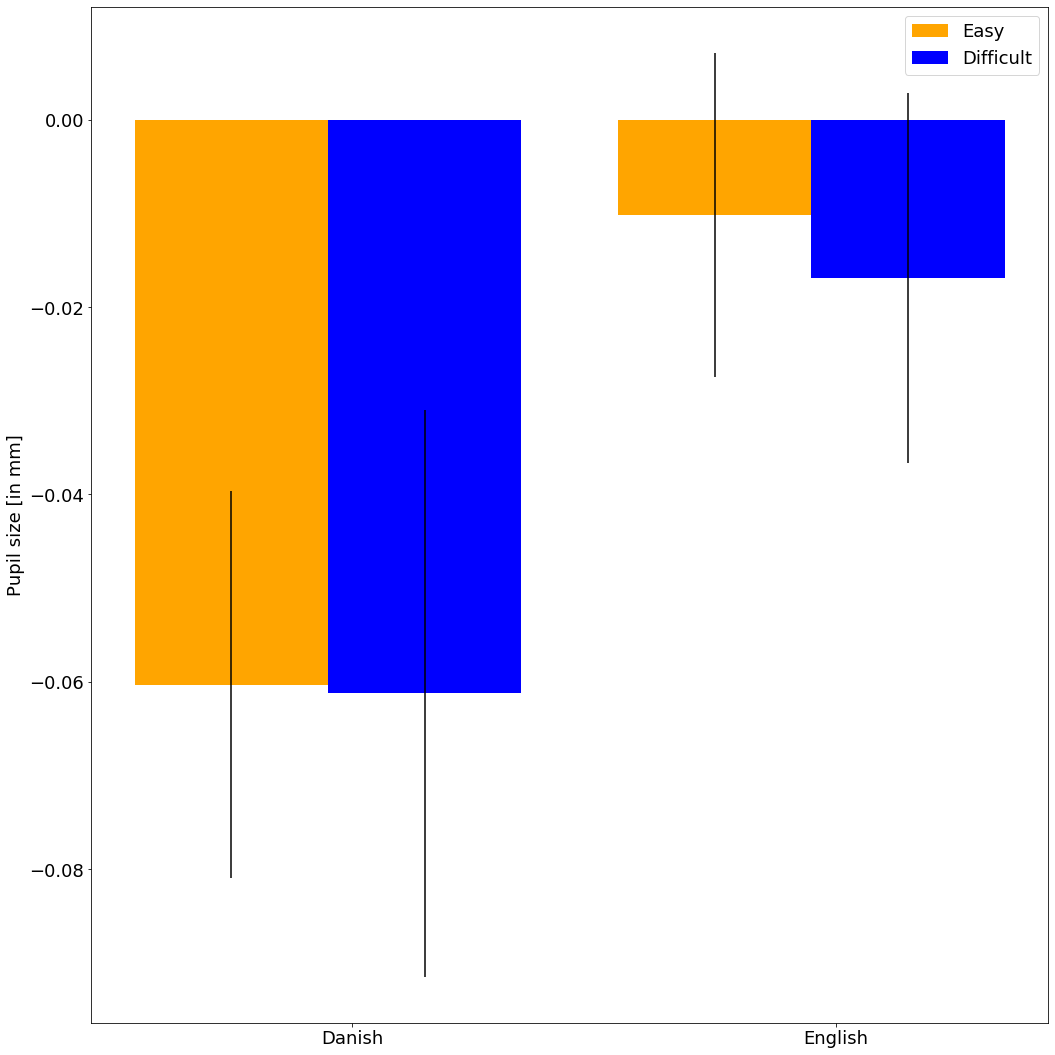

In [6]:
PlotTitle = 'PupilRelative_writingMean'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingMean']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
#ax1.set_ylim([0, 0.3])
ax1.set_ylabel('Pupil size [in mm]')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_writingMean_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Box plots of writing sections mean 

In [63]:
PlotTitle = 'pupil mean Sections for easy sessions'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMean1', 'writingSectionsMean2', 'writingSectionsMean3', 'writingSectionsMean4']


boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])
ax1.set_ylim([-1.75, 2])

(-1.75, 2)

In [87]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMean1', 'writingSectionsMean2', 'writingSectionsMean3', 'writingSectionsMean4']

label_fontSize = 18
others_fontSize = 12


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
list2 = list()
x_list1 = list()
x_list2 = list()


for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean())
    list2.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean())
    x_list1.append(x_inds[ind])
    x_list2.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
ax1.plot(x_list2, list2, '-.', color='gray', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_xlabel('Phases')
ax1.set_ylabel('Relative pupil size')
plt.rcParams.update({'font.size': 12})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


#plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\2019OctoberPresentation\PupilRelative_phases.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [133]:
PlotTitle = 'pupil mean Sections for difficult sessions'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMean1', 'writingSectionsMean2', 'writingSectionsMean3', 'writingSectionsMean4']


boxplot = df1[df1.SessionDifficulty=='D'].boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])
ax1.set_ylim([-1.75, 2])

(-1.75, 2)

# Box plots of sections median

In [236]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMedian1', 'writingSectionsMedian2', 'writingSectionsMedian3', 'writingSectionsMedian4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


0.05566546734094574
-6.299774063447803e-05
-0.03157506440673893
-0.0702083143997615


In [129]:
PlotTitle = 'pupilSections'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMedian1', 'writingSectionsMedian2', 'writingSectionsMedian3', 'writingSectionsMedian4']


boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])
ax1.set_ylim([-1.75, 2.25])

(-1.75, 2.25)

In [126]:
PlotTitle = 'pupilSections'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMedian1', 'writingSectionsMedian2', 'writingSectionsMedian3', 'writingSectionsMedian4']


boxplot = df1[df1.SessionDifficulty=='D'].boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])
ax1.set_ylim([-1.75, 2.25])

[Text(0, 0, 'section1'),
 Text(0, 0, 'section2'),
 Text(0, 0, 'section3'),
 Text(0, 0, 'section3')]

# Box plots of sections min

In [237]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMin1', 'writingSectionsMin2', 'writingSectionsMin3', 'writingSectionsMin4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


In [120]:
PlotTitle = 'pupilSections'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMin1', 'writingSectionsMin2', 'writingSectionsMin3', 'writingSectionsMin4']


boxplot = df1.boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4,5])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])

[Text(0, 0, 'section1'),
 Text(0, 0, 'section2'),
 Text(0, 0, 'section3'),
 Text(0, 0, 'section3')]

# Box plots of sections max

In [238]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMax1', 'writingSectionsMax2', 'writingSectionsMax3', 'writingSectionsMax4']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1.5,4,6.5,9])
#ax1.set_ylim([-0.5, 0.6])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


In [ ]:
PlotTitle = 'pupilSections'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['writingSectionsMax1', 'writingSectionsMax2', 'writingSectionsMax3', 'writingSectionsMax4']


boxplot = df1.boxplot(column=plot_variables)
#for ind, variable in enumerate(plot_variables):
    #ax1.bar(ind, df1[variable].mean(), yerr = df1[variable].std())
    
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,2,3,4,5])
ax1.set_xticklabels(['section1', 'section2', 'section3', 'section3'])

# Pupil mean

In [ ]:
PlotTitle = 'pupil Pattern'
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PupilRelative_writingMean']


#boxplot = df1[df1.SessionDifficulty=='E'].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1]

list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][df1.SessionDifficulty=='E'].mean())
    list1.append(df1[variable][df1.SessionDifficulty=='D'].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind]+0.8)
    p1 = ax1.bar(x_inds[ind], df1[variable][df1.SessionDifficulty=='E'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='E'].std()/(df1[variable][df1.SessionDifficulty=='E'].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind]+0.8, df1[variable][df1.SessionDifficulty=='D'].mean(), yerr = \
                 df1[variable][df1.SessionDifficulty=='D'].std()/(df1[variable][df1.SessionDifficulty=='D'].count()), color='blue', label='Difficult')
    
    
ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_title(PlotTitle)
ax1.set_xticks([1,1.8])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([-0.5, 0.6])
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))


# Pupil size start and end

In [11]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils_startEnd.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]

df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])


In [12]:
pupilReading = [df1.PupilRelative_readingStart[i] if df1.Phase[i]=='S' else df1.PupilRelative_readingEnd[i] for i in range(0,len(df1.PupilRelative_readingStart))]
pupilWriting = [df1.PupilRelative_writingStart[i] if df1.Phase[i]=='S' else df1.PupilRelative_writingEnd[i] for i in range(0,len(df1.PupilRelative_writingStart))]

In [13]:
pupilDilation, subjects, Days, DayDT, Language, Session, SessionDifficulty  = list(), list(), list(), list(), list(), \
list(), list()


for i in range(0, len(pupilReading), 2):
    if i < len(pupilReading)-1:
        pupilDilation.extend([pupilReading[i], pupilReading[i+1], pupilWriting[i], pupilWriting[i+1]])
        subjects.extend([df1.Subject[i]]*4)
        Days.extend([df1.Day[i]]*4)
        DayDT.extend([df1.DayDT[i]]*4)
        Language.extend([df1.Language[i]]*4)
        Session.extend([df1.Session[i]]*4)
        SessionDifficulty.extend([df1.SessionDifficulty[i]]*4)
        
        

In [14]:
phases = [1,2,3,4]*(int(len(pupilDilation)/4))

In [15]:
df2 = pd.DataFrame(list(zip(subjects, Days, DayDT, Language, Session, SessionDifficulty, phases, pupilDilation)), \
                   columns=['Subject', 'Day', 'DayDT', 'Language', 'Session', 'SessionDifficulty', 'Phases', \
                            'PupilDilation'])


In [16]:
DayNr = [day[0] for day in df2.Day]

df2['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df2.Day]

df2['TypingTechnique'] = TypingTechnique

In [17]:
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)


x_inds = [1, 1.5, 2, 2.5]
x_inds2 = [0, 2.5, 5, 7.5]
list1 = list()
x_list1 = list()
c = ['blue', 'orange', 'green', 'red']
variable = 'PupilDilation'

for indDay, day in enumerate(np.unique(df2.DayDT)):
    if day==0:
        continue

    phase=1
    p1 = ax1.bar(x_inds2[indDay-1] + x_inds[0], df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].mean(), yerr = \
                 df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].std()/ \
                 np.sqrt(df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].count()), \
                 width=0.5, color= 'cyan', error_kw=dict(lw=5, capsize=5, capthick=3))
    phase=2
    p2 = ax1.bar(x_inds2[indDay-1] + x_inds[1], df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].mean(), yerr = \
                 df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].std()/ \
                 np.sqrt(df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].count()), \
                 width=0.5, color= 'pink', error_kw=dict(lw=5, capsize=5, capthick=3))
    phase=3
    p3 = ax1.bar(x_inds2[indDay-1] + x_inds[2], df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].mean(), yerr = \
                 df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].std()/ \
                 np.sqrt(df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].count()), \
                 width=0.5, color= 'green', error_kw=dict(lw=5, capsize=5, capthick=3))
    phase=4
    p4 = ax1.bar(x_inds2[indDay-1] + x_inds[3], df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].mean(), yerr = \
                 df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].std()/ \
                 np.sqrt(df2[variable][np.logical_and(np.logical_and(df2.DayDT==day, df2.DayDT==day), df2.Phases==phase)].count()), \
                 width=0.5, color= 'red', error_kw=dict(lw=5, capsize=5, capthick=3))
    
ax1.set_xticks([1.75, 4.25, 6.75, 9.25])
ax1.set_ylim([-0.2, 0.6])
ax1.set_yticks([-0.2, 0.0, 0.2, 0.4, 0.6])
ax1.set_ylabel('Relative pupil size [mm]')
ax1.set_xlabel('Days')
ax1.set_xticklabels(['1', '2', '3', '4'])
plt.rcParams.update({'font.size': 52})
plt.legend([p1, p2, p3, p4], ['Reading start', 'Reading end', 'Writing start', 'Writing end'], frameon=False)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\pupilPhase_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [52]:
# marginal means

# phase1
day1_phase1_m = -0.03023
day1_phase1_s = 0.0289

day2_phase1_m = 0.01045
day2_phase1_s = 0.0286

day3_phase1_m = 0.00903
day3_phase1_s = 0.0287

day4_phase1_m = 0.03148
day4_phase1_s = 0.0284


# phase 2
day1_phase2_m = 0.25616
day1_phase2_s = 0.0289

day2_phase2_m = 0.19439
day2_phase2_s = 0.0286

day3_phase2_m = 0.13363
day3_phase2_s = 0.0287

day4_phase2_m = 0.17829
day4_phase2_s = 0.0284


# phase 3
day1_phase3_m = 0.25066
day1_phase3_s = 0.0289

day2_phase3_m = 0.19219
day2_phase3_s = 0.0286

day3_phase3_m = 0.16842
day3_phase3_s = 0.0287

day4_phase3_m = 0.17852
day4_phase3_s = 0.0284


# phase 4
day1_phase4_m = -0.11944
day1_phase4_s = 0.0289

day2_phase4_m = -0.08856
day2_phase4_s = 0.0286

day3_phase4_m = -0.13331
day3_phase4_s = 0.0287

day4_phase4_m = -0.05119
day4_phase4_s = 0.0284


day_phase1_m = [day2_phase1_m - day1_phase1_m, day3_phase1_m - day2_phase1_m, day4_phase1_m - day3_phase1_m]
day_phase1_s = [np.sqrt(day2_phase1_s**2+day1_phase1_s**2), np.sqrt(day3_phase1_s**2+day2_phase1_s**2), np.sqrt(day4_phase1_s**2+day3_phase1_s**2)]
print(day_phase1_m)

day_phase2_m = [day2_phase2_m - day1_phase2_m, day3_phase2_m - day2_phase2_m, day4_phase2_m - day3_phase2_m]
day_phase2_s = [np.sqrt(day2_phase2_s**2+day1_phase2_s**2), np.sqrt(day3_phase2_s**2+day2_phase2_s**2), np.sqrt(day4_phase2_s**2+day3_phase2_s**2)]
print(day_phase2_m)

day_phase3_m = [day2_phase3_m - day1_phase3_m, day3_phase3_m - day2_phase3_m, day4_phase3_m - day3_phase3_m]
day_phase3_s = [np.sqrt(day2_phase3_s**2+day1_phase3_s**2), np.sqrt(day3_phase3_s**2+day2_phase3_s**2), np.sqrt(day4_phase3_s**2+day3_phase3_s**2)]
print(day_phase3_m)

day_phase4_m = [day2_phase4_m - day1_phase4_m, day3_phase4_m - day2_phase4_m, day4_phase4_m - day3_phase4_m]
day_phase4_s = [np.sqrt(day2_phase4_s**2+day1_phase4_s**2), np.sqrt(day3_phase4_s**2+day2_phase4_s**2), np.sqrt(day4_phase4_s**2+day3_phase4_s**2)]
print(day_phase4_m)

print('se: ', day_phase1_s)





[0.04068, -0.0014199999999999994, 0.02245]
[-0.06176999999999999, -0.06076000000000001, 0.044660000000000005]
[-0.058469999999999994, -0.023770000000000013, 0.010100000000000026]
[0.030880000000000005, -0.04475000000000001, 0.08212000000000001]
se:  [0.04065919330237628, 0.0405172802641046, 0.04037635446644484]


In [30]:

#df2.to_csv(r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils_startEnd.csv', sep=',',na_rep='', header=True, index=False)


# Pupil size 4 phases

In [71]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils_4Phases.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]

# pupil size on sections of writing
writingSectionsMean1 = [float(i.split(',')[0][1:]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean2 = [float(i.split(',')[1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean3 = [float(i.split(',')[2]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]
writingSectionsMean4 = [float(i.split(',')[3][0:-1]) if isinstance(i, str) else np.nan for i in df.PupilRelative_writingSectionsMean]

df['writingSectionsMean1'] = writingSectionsMean1
df['writingSectionsMean2'] = writingSectionsMean2
df['writingSectionsMean3'] = writingSectionsMean3
df['writingSectionsMean4'] = writingSectionsMean4



In [72]:
pupilPhases = list()

for i in range(0, len(df.PupilRelative_writingSectionsMean)):
    if df.Phases[i]==1:
        pupilPhases.append(df.writingSectionsMean1[i])
    elif df.Phases[i]==2:
        pupilPhases.append(df.writingSectionsMean2[i])
    elif df.Phases[i]==3:
        pupilPhases.append(df.writingSectionsMean3[i])
    else:
        pupilPhases.append(df.writingSectionsMean4[i])
        
        

In [74]:
df['pupilPhases'] = pupilPhases

In [75]:
DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

In [76]:
df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])

df1.to_csv(r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Pupils\Subject_Block_Session_Trial_Pupils_4Phases.csv', sep=',',na_rep='', header=True, index=False)


# Pupil size for baseline question

In [11]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\BaselineQuestion\Subject_Block_Session_PupilSize.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Pupils\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)


corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

df1 = df.merge(corr_short, on=['Subject','Day', 'Session'])


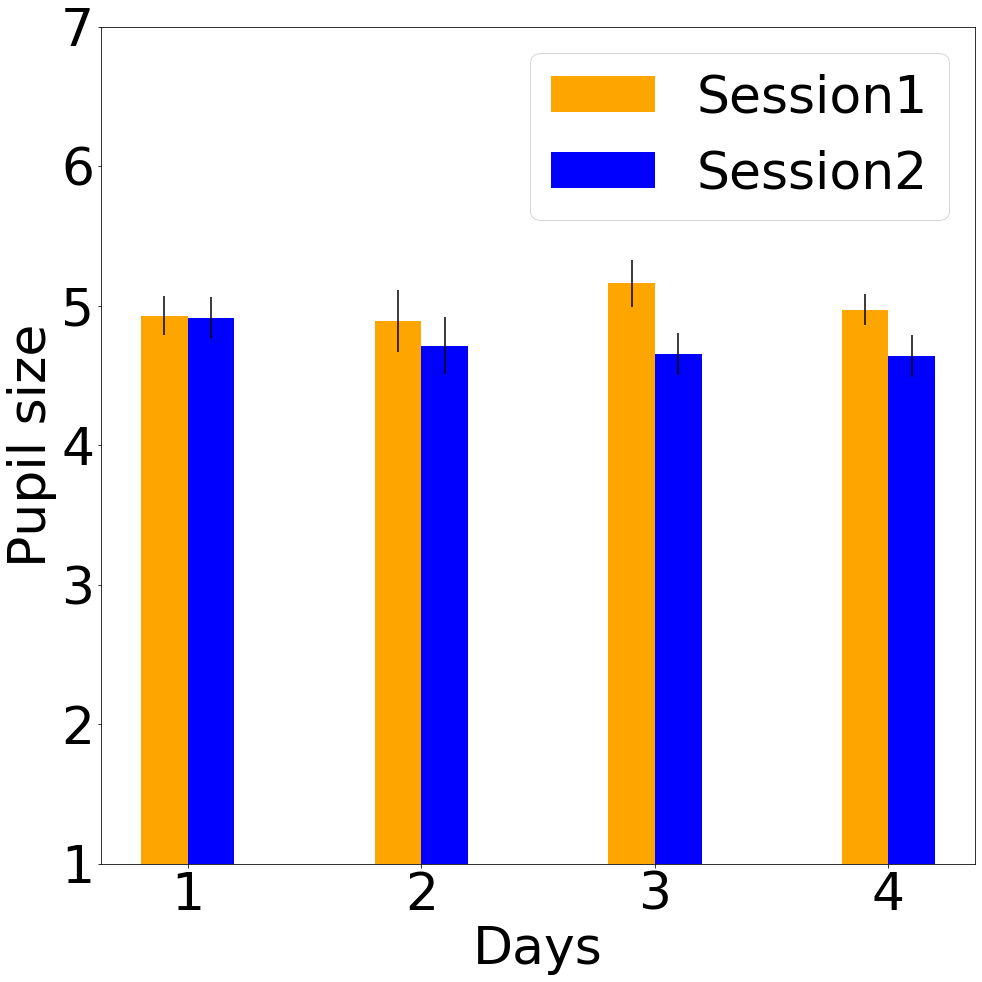

In [13]:
PlotTitle = 'PupilRight'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'PupilRight'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
        
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Pupil size')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\PupilRight_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

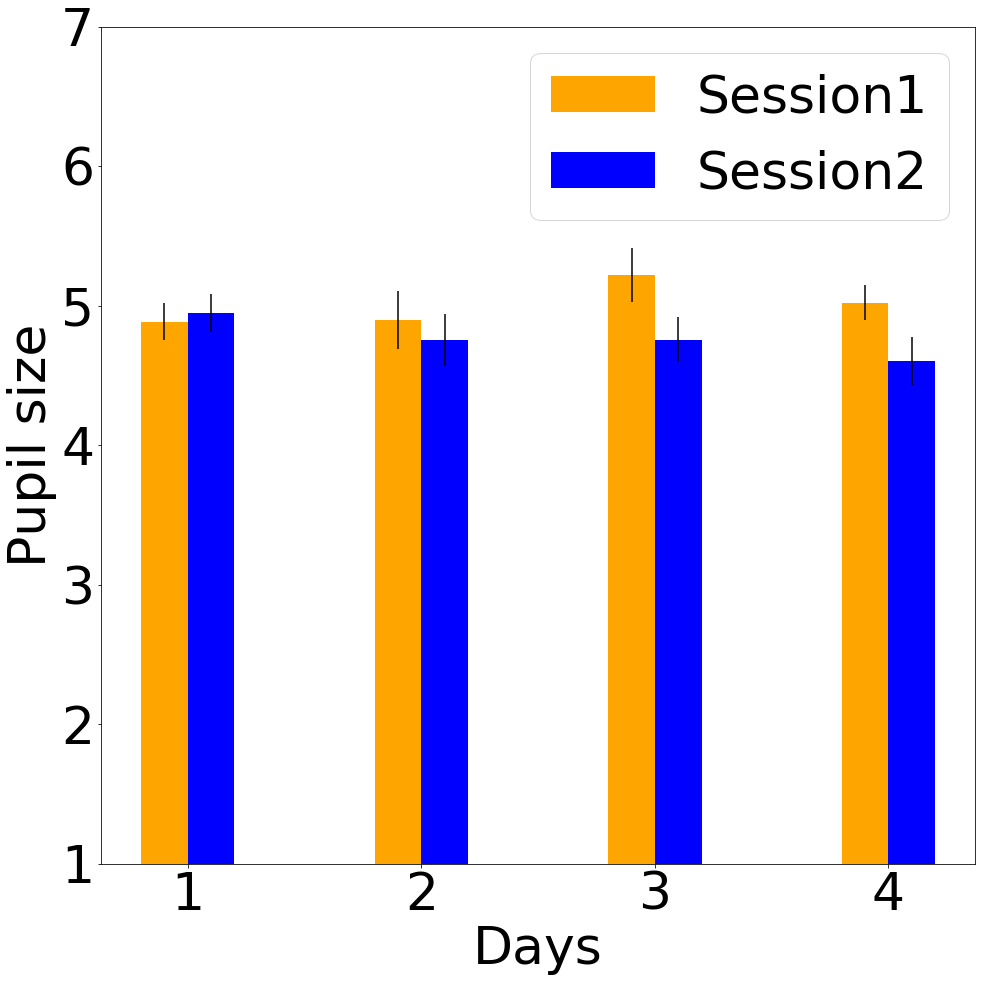

In [14]:
PlotTitle = 'PupilLeft'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'PupilLeft'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
        
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==1, df1.DayDT==day)].count()), \
                 color='orange', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.Session==2, df1.DayDT==day)].count()), \
                 color='blue', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Pupil size')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\PupilLeft_blocks_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))